In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("rolling_stones_spotify.csv")

In [4]:
data.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [6]:
data.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [7]:
data.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [8]:
data.describe()

Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

In [10]:
#Identify Duplicates
data.duplicated(['id']).sum()

np.int64(0)

In [11]:
# Convert the 'release_date' column to datetime type
data['release_date'] = pd.to_datetime(data['release_date'])

In [12]:
data['release_date'].head()

0   2022-06-10
1   2022-06-10
2   2022-06-10
3   2022-06-10
4   2022-06-10
Name: release_date, dtype: datetime64[ns]

In [15]:
obs_cols = data.select_dtypes(include='object').columns
# Convert object columns to categorical
for col in obs_cols:
    print(f"{col}: {data[col].nunique()}")

name: 954
album: 90
id: 1610
uri: 1610


In [16]:
data.name.unique()

array(['Concert Intro Music - Live', 'Street Fighting Man - Live',
       'Start Me Up - Live', "If You Can't Rock Me - Live",
       'Don’t Stop - Live', 'Monkey Man - Live', 'Angie - Live',
       'Let It Bleed - Live', 'Midnight Rambler - Live',
       'Tumbling Dice - Live', 'Band Introductions - Live',
       'Thru And Thru - Live', 'Happy - Live', 'Gimme Shelter - Live',
       'You Got Me Rocking - Live', "Can't You Hear Me Knocking - Live",
       'Honky Tonk Women - Live', 'Satisfaction - Live',
       "It's Only Rock 'N' Roll - Live",
       'When The Whip Comes Down - Live', 'Brown Sugar - Live',
       'Sympathy For The Devil - Live', 'Jumpin Jack Flash - Live',
       'Honky Tonk Women - Live At The El Mocambo 1977',
       'All Down The Line - Live At The El Mocambo 1977',
       'Hand Of Fate - Live At The El Mocambo 1977',
       'Route 66 - Live At The El Mocambo 1977',
       'Fool To Cry - Live At The El Mocambo 1977',
       'Crazy Mama - Live At The El Mocambo 1977

In [17]:
data.album.unique()

array(['Licked Live In NYC', 'Live At The El Mocambo',
       'Tattoo You (Super Deluxe)', 'Tattoo You', 'A Bigger Bang (Live)',
       'Steel Wheels Live', 'Goats Head Soup (Deluxe)',
       'Bridges To Buenos Aires (Live)', 'Bridges To Bremen (Live)',
       'Honk (Deluxe)', 'Voodoo Lounge Uncut (Live)',
       'From The Vault: No Security - San Jose 1999 (Live)', 'On Air',
       'On Air (Deluxe)', 'Sticky Fingers Live At The Fonda Theatre',
       'Ladies & Gentlemen (Live)', 'Blue & Lonesome',
       'Havana Moon (Live)', 'Totally Stripped - Brixton (Live)',
       'Totally Stripped - Amsterdam (Live)', 'Totally Stripped (Live)',
       'Totally Stripped - Paris (Live)',
       'Live 1965: Music From Charlie Is My Darling (Live From England/1965)',
       'Live At The Checkerboard Lounge', "Some Girls: Live In Texas '78",
       'A Bigger Bang (2009 Re-Mastered)', 'Live Licks',
       'Bridges To Babylon', 'Bridges To Babylon (Remastered)',
       'Stripped', 'Voodoo Lounge (Remas

In [18]:
data.track_number.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [21]:
data['track_number'] = data['track_number'].astype('category')

In [47]:
#Check columns with unique values
# Remove columns with unique values
unique_cols = [col for col in data.columns if data[col].nunique() == len(data)]
data_new = data.drop(columns=unique_cols)

# Verify the remaining columns
print("Remaining columns after removing unique value columns:")
print(data_new.columns)

Remaining columns after removing unique value columns:
Index(['name', 'album', 'release_date', 'track_number', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms'],
      dtype='object')


In [48]:
data_new.describe()

release_date  acousticness  danceability       energy  \
count                           1610   1610.000000   1610.000000  1610.000000   
mean   1992-04-23 12:57:14.534161536      0.250475      0.468860     0.792352   
min              1964-04-16 00:00:00      0.000009      0.104000     0.141000   
25%              1970-09-04 00:00:00      0.058350      0.362250     0.674000   
50%              1986-03-24 00:00:00      0.183000      0.458000     0.848500   
75%              2017-12-01 00:00:00      0.403750      0.578000     0.945000   
max              2022-06-10 00:00:00      0.994000      0.887000     0.999000   
std                              NaN      0.227397      0.141775     0.179886   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   
std            0.276249     0.34910     2.994003     0.051631    29.233483   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000  
std       0.231253    12.426859  108333.474920

## Check for Outliers

In [49]:
data_new.describe()

release_date  acousticness  danceability       energy  \
count                           1610   1610.000000   1610.000000  1610.000000   
mean   1992-04-23 12:57:14.534161536      0.250475      0.468860     0.792352   
min              1964-04-16 00:00:00      0.000009      0.104000     0.141000   
25%              1970-09-04 00:00:00      0.058350      0.362250     0.674000   
50%              1986-03-24 00:00:00      0.183000      0.458000     0.848500   
75%              2017-12-01 00:00:00      0.403750      0.578000     0.945000   
max              2022-06-10 00:00:00      0.994000      0.887000     0.999000   
std                              NaN      0.227397      0.141775     0.179886   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   
std            0.276249     0.34910     2.994003     0.051631    29.233483   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000  
std       0.231253    12.426859  108333.474920

In [32]:
num_vars = data_new.select_dtypes(include = ['float', 'int']).columns
len(num_vars)

11

## Use Box Plot to check for outliers

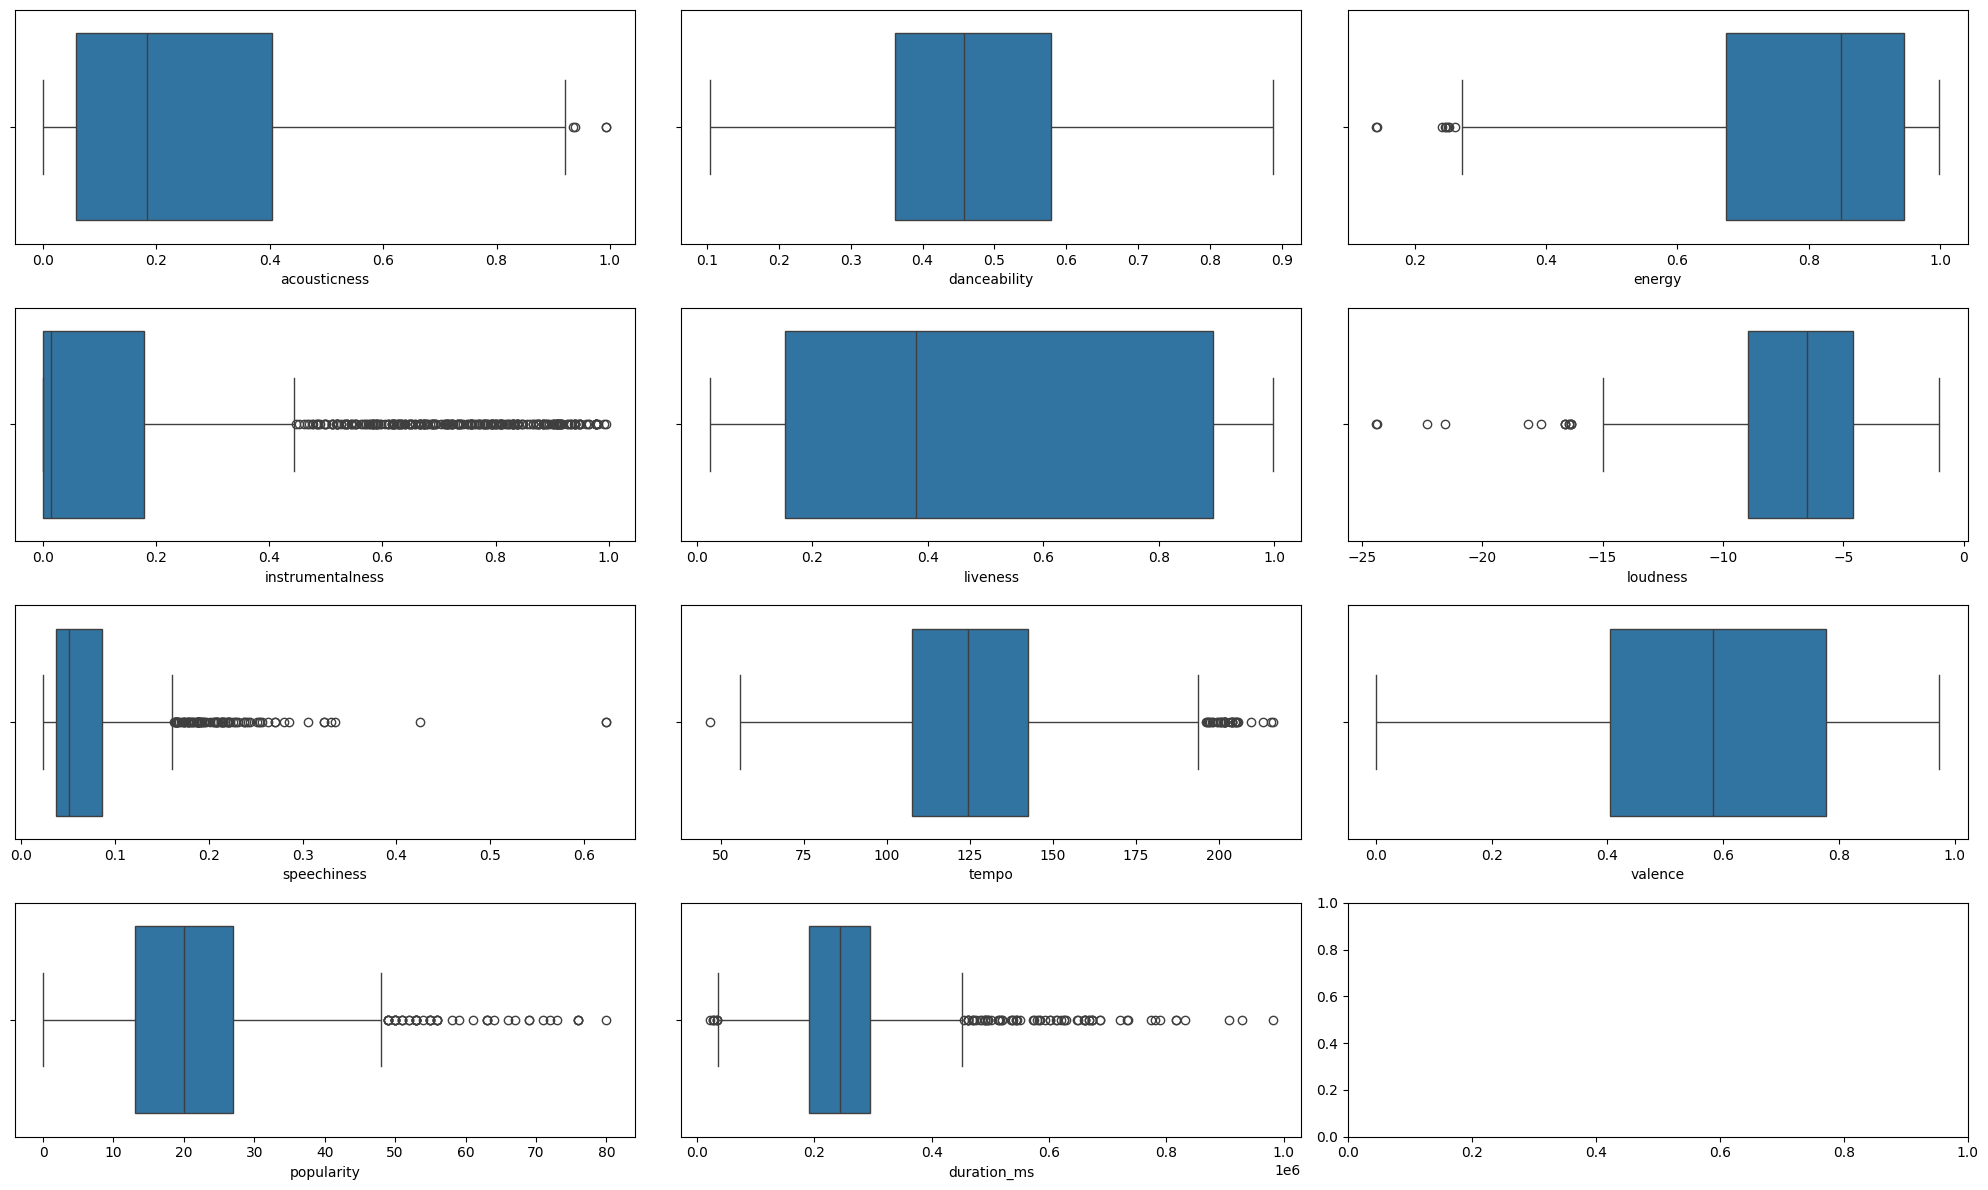

In [36]:
f, ax = plt.subplots(4,3,figsize=(20, 12))
k=0
for i in range(4):
    for j in range(3):
        if k < len(num_vars):
            sns.boxplot(data=data_new, x=num_vars[k], ax=ax[i][j])
            k += 1
plt.tight_layout()


## Outliers

In [41]:
def check_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound,upper_bound

In [45]:
# Identify and Cap the outliers at q3 + 1.5 * iqr or q1 - 1.5 * iqr
for var in num_vars:
    lower_limit, upper_limit = check_outlier(data_new[var])
    count = data_new[(data_new[var] < lower_limit) | (data_new[var] > upper_limit)].shape[0]
    print(f"Variable: {var}, \nOutliers: {count}, Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")
    data_new.loc[data_new[var] < lower_limit, var] = lower_limit
    data_new.loc[data_new[var] > upper_limit, var] = upper_limit

Variable: acousticness, 
Outliers: 4, Lower Limit: -0.45975, Upper Limit: 0.9218500000000001
Variable: danceability, 
Outliers: 0, Lower Limit: 0.038624999999999965, Upper Limit: 0.9016249999999999
Variable: energy, 
Outliers: 8, Lower Limit: 0.2675000000000002, Upper Limit: 1.3514999999999997
Variable: instrumentalness, 
Outliers: 272, Lower Limit: -0.26795187499999995, Upper Limit: 0.44717112499999995
Variable: liveness, 
Outliers: 0, Lower Limit: -0.9581249999999999, Upper Limit: 2.004875
Variable: loudness, 
Outliers: 14, Lower Limit: -15.543125, Upper Limit: 1.9518750000000002
Variable: speechiness, 
Outliers: 92, Lower Limit: -0.03865, Upper Limit: 0.16175
Variable: tempo, 
Outliers: 34, Lower Limit: 54.94324999999999, Upper Limit: 194.80325
Variable: valence, 
Outliers: 0, Lower Limit: -0.15637500000000004, Upper Limit: 1.338625
Variable: popularity, 
Outliers: 48, Lower Limit: -8.0, Upper Limit: 48.0
Variable: duration_ms, 
Outliers: 76, Lower Limit: 33552.875, Upper Limit: 452

/var/folders/6s/1dq9wkl103xfty3nj9_rj3x80000gp/T/ipykernel_12172/2143374151.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33552.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_new.loc[data_new[var] < lower_limit, var] = lower_limit


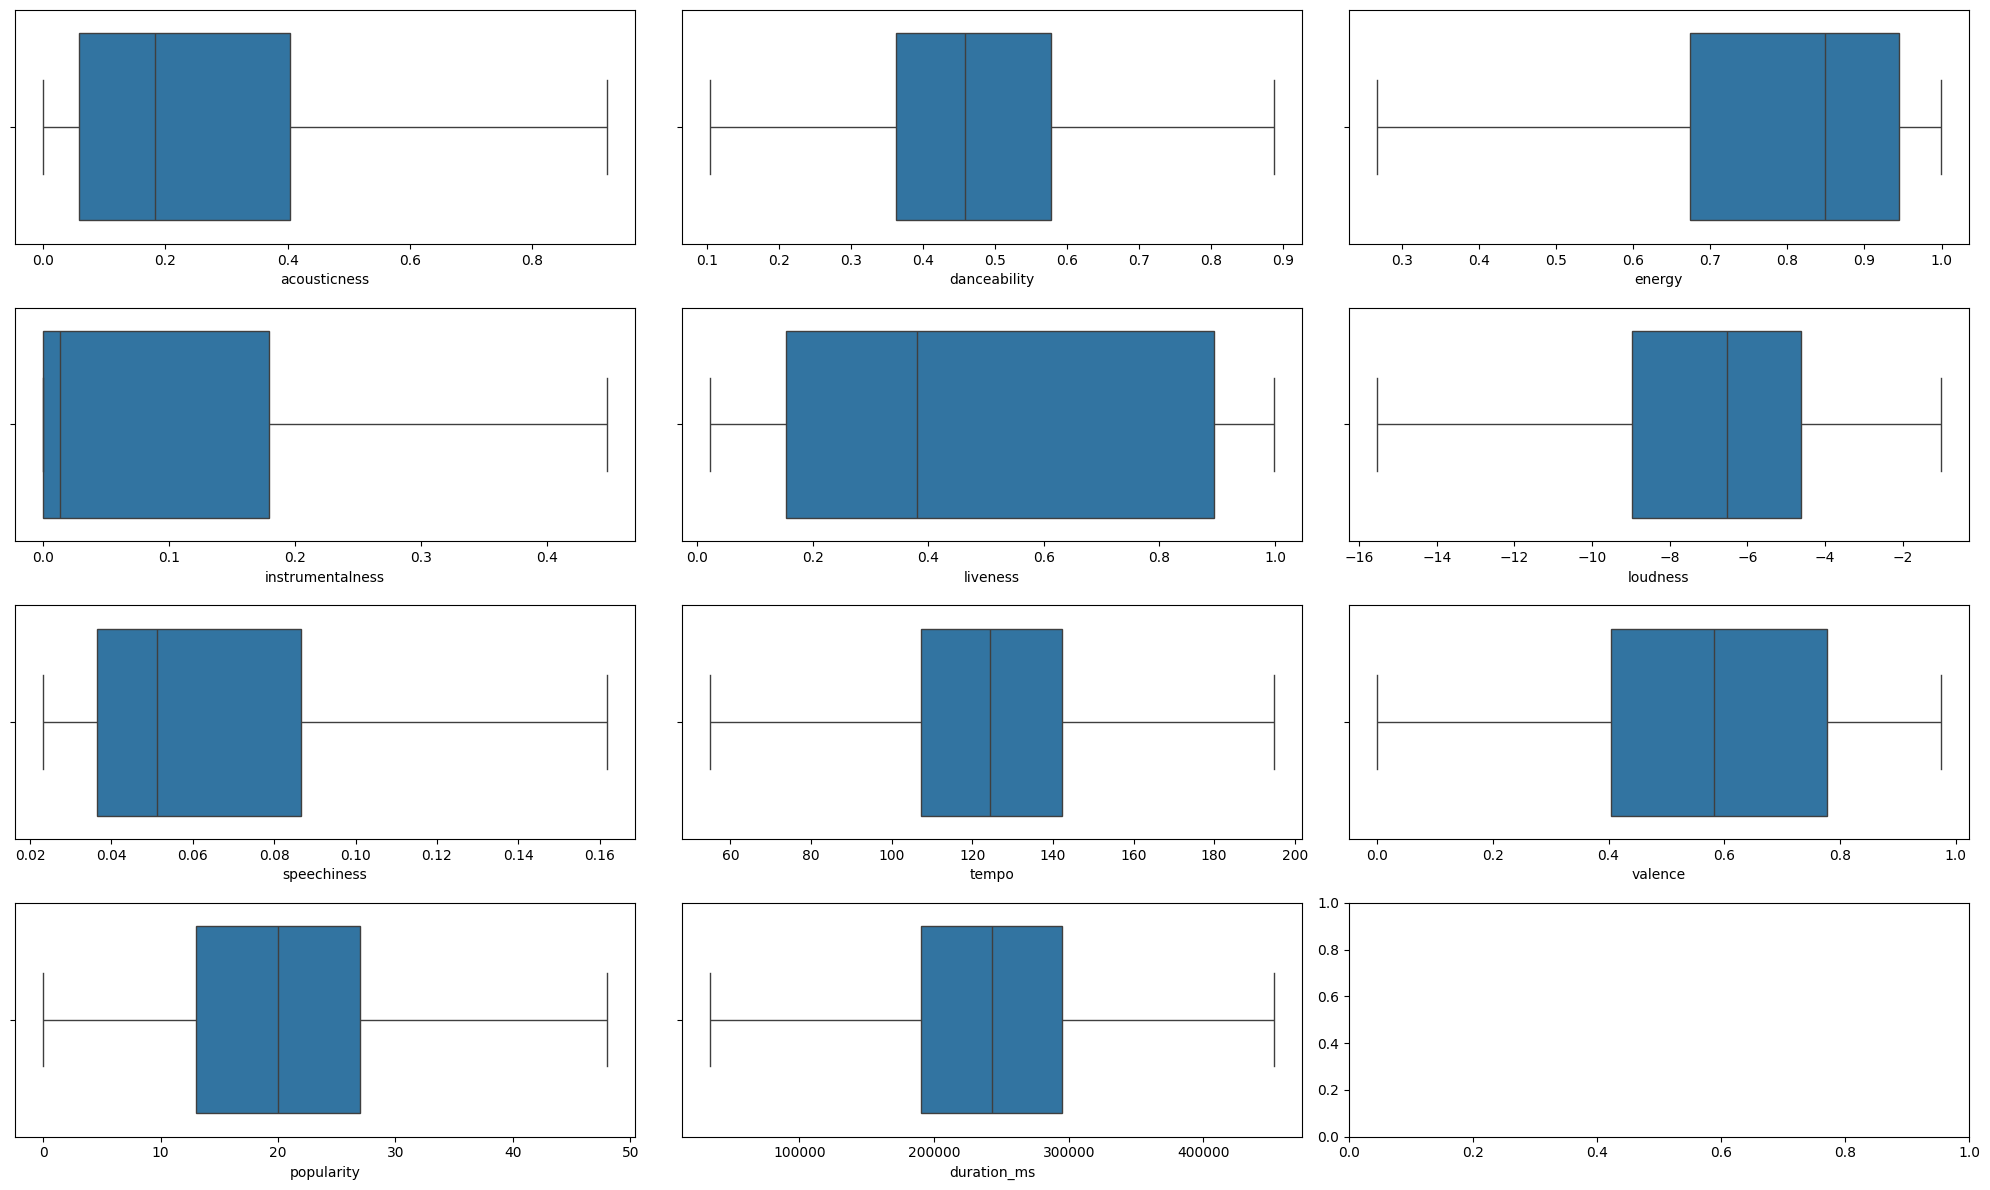

In [46]:
#Check Box Plots again
f, ax = plt.subplots(4,3,figsize=(20, 12))
k=0
for i in range(4):
    for j in range(3):
        if k < len(num_vars):
            sns.boxplot(data=data_new, x=num_vars[k], ax=ax[i][j])
            k += 1
plt.tight_layout()

In [51]:
data_new['year'] = data_new['release_date'].dt.year
data_new['month'] = data_new['release_date'].dt.month
data_new['day'] = data_new['release_date'].dt.day

In [55]:
#Drop release date column
data_new = data_new.drop(columns=['release_date'])

In [56]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              1610 non-null   object  
 1   album             1610 non-null   object  
 2   track_number      1610 non-null   category
 3   acousticness      1610 non-null   float64 
 4   danceability      1610 non-null   float64 
 5   energy            1610 non-null   float64 
 6   instrumentalness  1610 non-null   float64 
 7   liveness          1610 non-null   float64 
 8   loudness          1610 non-null   float64 
 9   speechiness       1610 non-null   float64 
 10  tempo             1610 non-null   float64 
 11  valence           1610 non-null   float64 
 12  popularity        1610 non-null   int64   
 13  duration_ms       1610 non-null   int64   
 14  year              1610 non-null   int32   
 15  month             1610 non-null   int32   
 16  day               1610 n

##  Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album


In [64]:
## Sort and pick top 10 songs basis popularity
top_10_songs = data_new.sort_values(by='popularity', ascending=False).head(10)
print("Top 10 Songs by Popularity:")
print(top_10_songs[['name', 'album','popularity']])

Top 10 Songs by Popularity:
                                                   name  \
1403                                    Paint It, Black   
1248                                      Gimme Shelter   
1472       (I Can't Get No) Satisfaction - Mono Version   
862                       Start Me Up - Remastered 2009   
1257  Sympathy For The Devil - 50th Anniversary Edition   
901                   Beast Of Burden - Remastered 1994   
1023                                              Angie   
893                               Miss You - Remastered   
1122                             Wild Horses - 2009 Mix   
1256                 You Can't Always Get What You Want   

                                           album  popularity  
1403                                   Aftermath          80  
1248                                Let It Bleed          76  
1472                            Out Of Our Heads          76  
862                Tattoo You (2009 Re-Mastered)          76  
1257  B

In [69]:

## Average popularity of songs by album 
print("Average Popularity of Songs by Album:")
data_new.groupby(['album'])['popularity'].mean().sort_values(ascending=False).head(10)




Average Popularity of Songs by Album:


album
Sticky Fingers (Remastered)                                  53.300000
Some Girls                                                   48.100000
Tattoo You (2009 Re-Mastered)                                46.454545
Exile On Main Street (2010 Re-Mastered)                      44.166667
Beggars Banquet (50th Anniversary Edition)                   43.700000
Aftermath                                                    43.090909
Goats Head Soup (Remastered 2009)                            40.300000
Out Of Our Heads                                             39.583333
Black And Blue (Remastered 2009)                             38.500000
Let It Bleed (50th Anniversary Edition / Remastered 2019)    38.333333
Name: popularity, dtype: float64

## Sticky Fingers (Remastered)  and Some Girls are top two ambums

## Further deep dive and exploratory analysis 

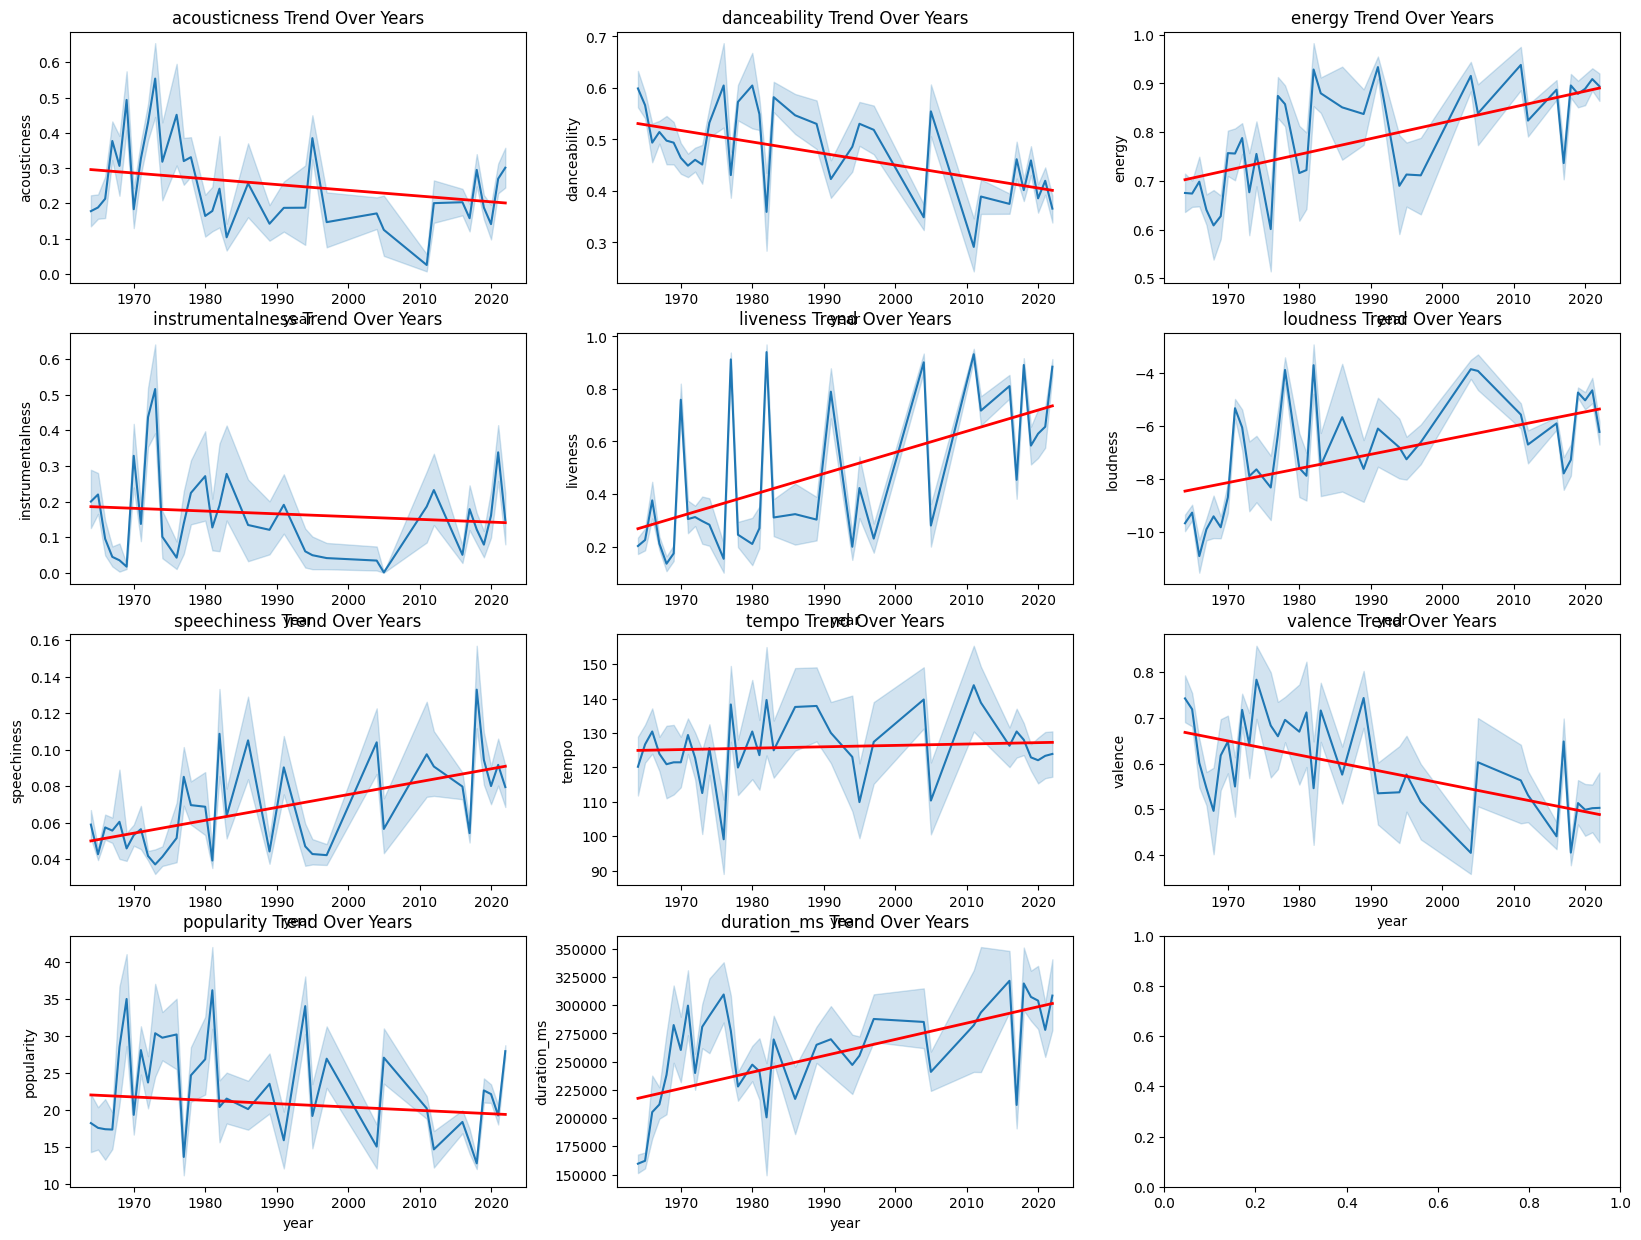

In [72]:
f, ax = plt.subplots(4,3, figsize=(20, 15))
k=0
for i in range(4):
    for j in range(3):
        if k < len(num_vars):
            sns.lineplot(data=data_new, x='year', y=num_vars[k], ax=ax[i][j])
            k += 1
            z = np.polyfit(data_new['year'], data_new[num_vars[k-1]], 1)
            p = np.poly1d(z)
            ax[i][j].plot(data_new['year'], p(data_new['year']), color='red', linewidth=2)
            ax[i][j].set_title(f'{num_vars[k-1]} Trend Over Years')

## Relationship of Popularity to different factors

/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


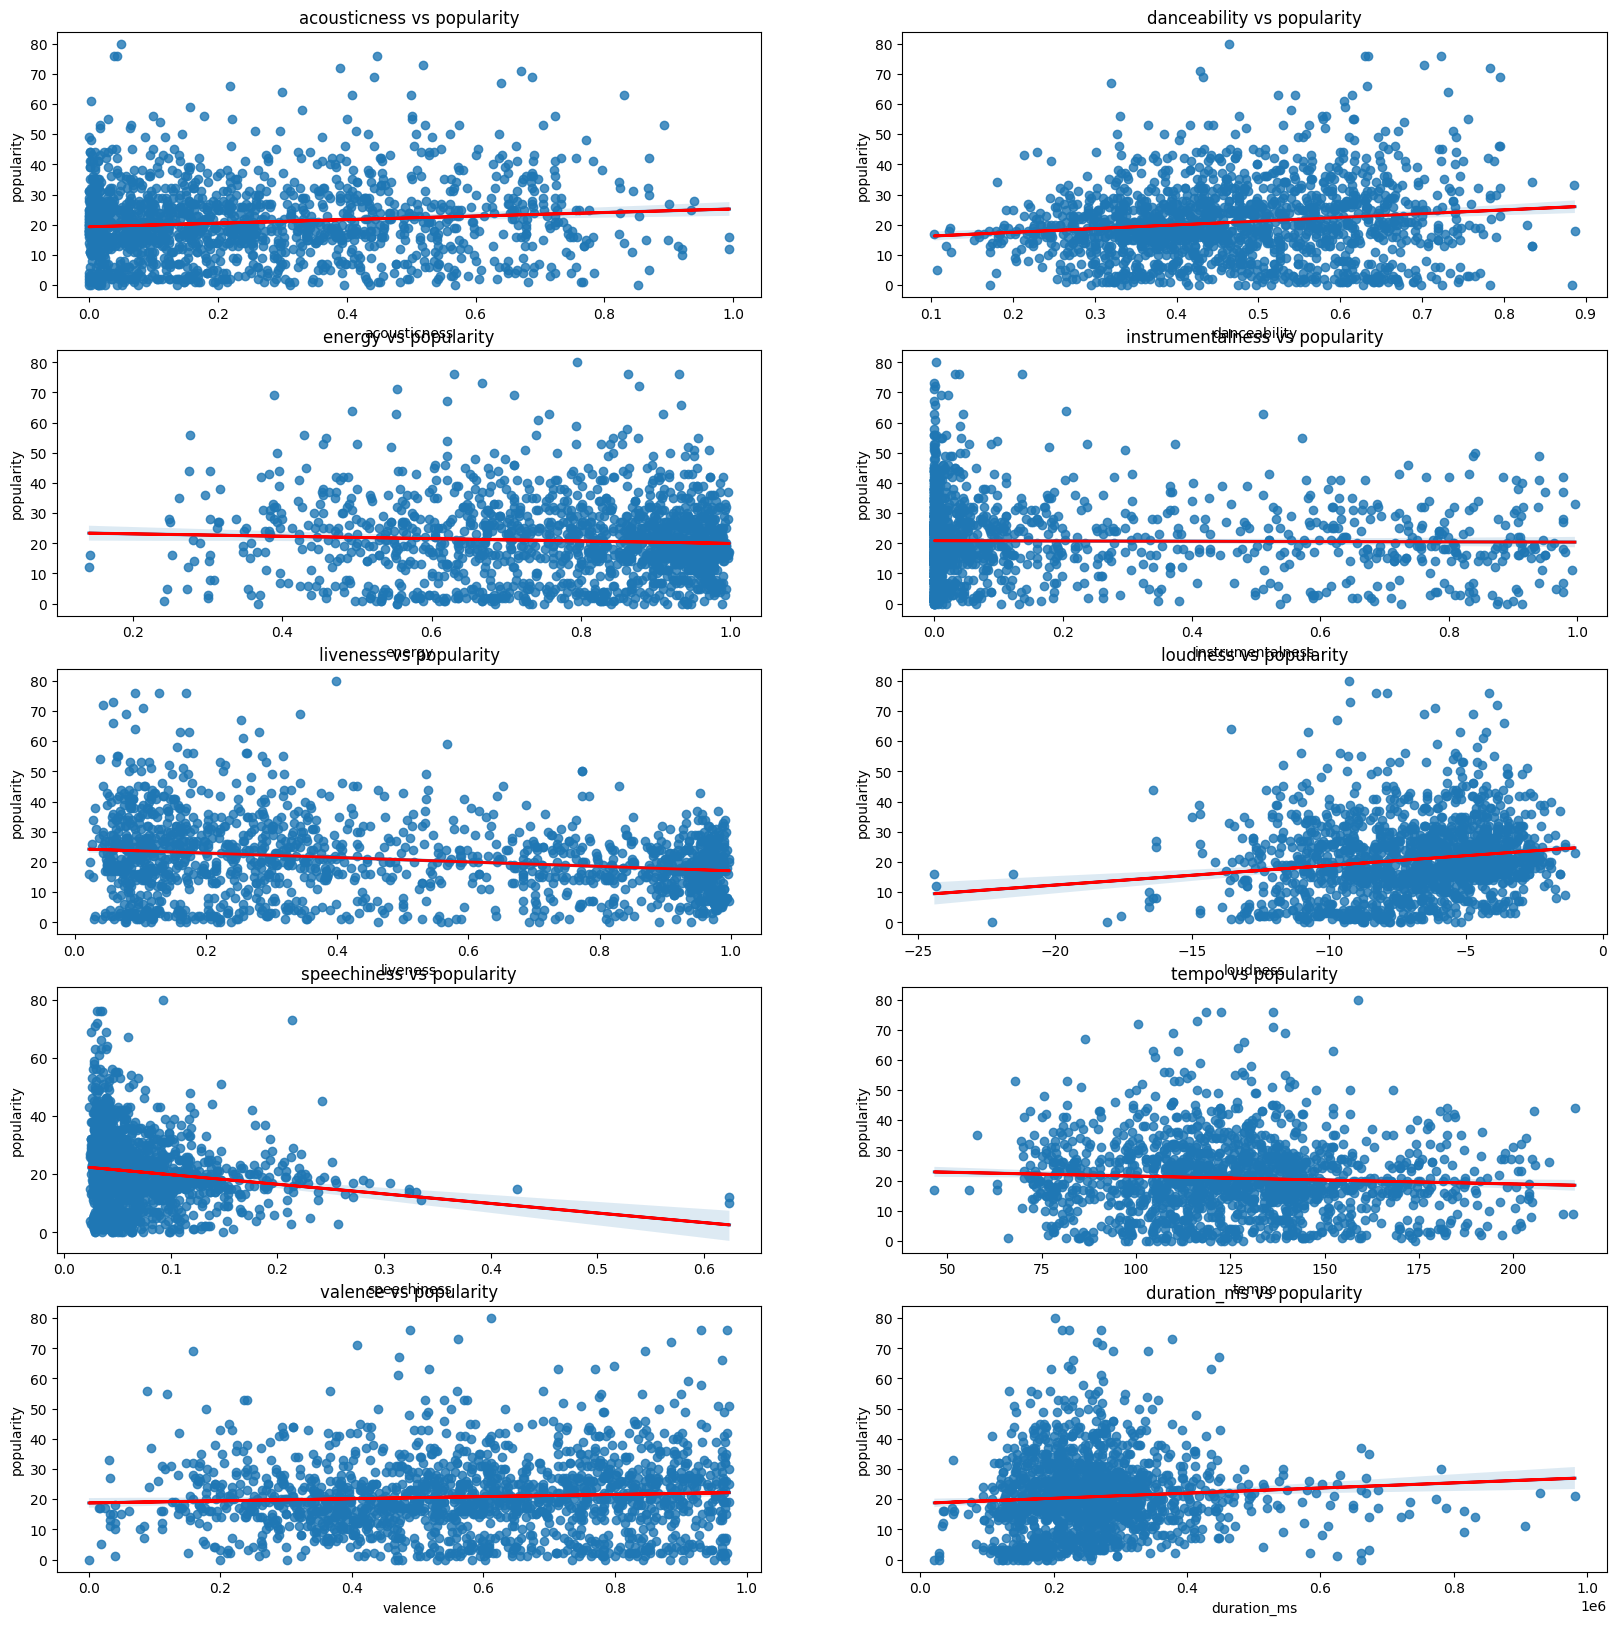

In [74]:
y = 'popularity'
vars = num_vars.drop('popularity')
k = 0
f, ax = plt.subplots(5, 2, figsize=(20, 20))
for i in range(5):
    for j in range(2):
        if k < len(vars):
            sns.regplot(data=data_new, x=vars[k], y=y, ax=ax[i][j])
            z = np.polyfit(data_new[vars[k]], data_new[y], 1)
            p = np.poly1d(z)
            ax[i][j].plot(data_new[vars[k]], p(data_new[vars[k]]), color='red', linewidth=2)
            ax[i][j].set_title(f'{vars[k]} vs {y}')
            k += 1

## Not able to establish any firm relationship between popularity and sound factors

## Groups of data for 5 years

In [76]:
data_new['year_class'] = pd.cut(data_new['year'], 6, labels=[1,2,3,4,5,6])
data_new['year_class']

0       6
1       6
2       6
3       6
4       6
       ..
1605    1
1606    1
1607    1
1608    1
1609    1
Name: year_class, Length: 1610, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

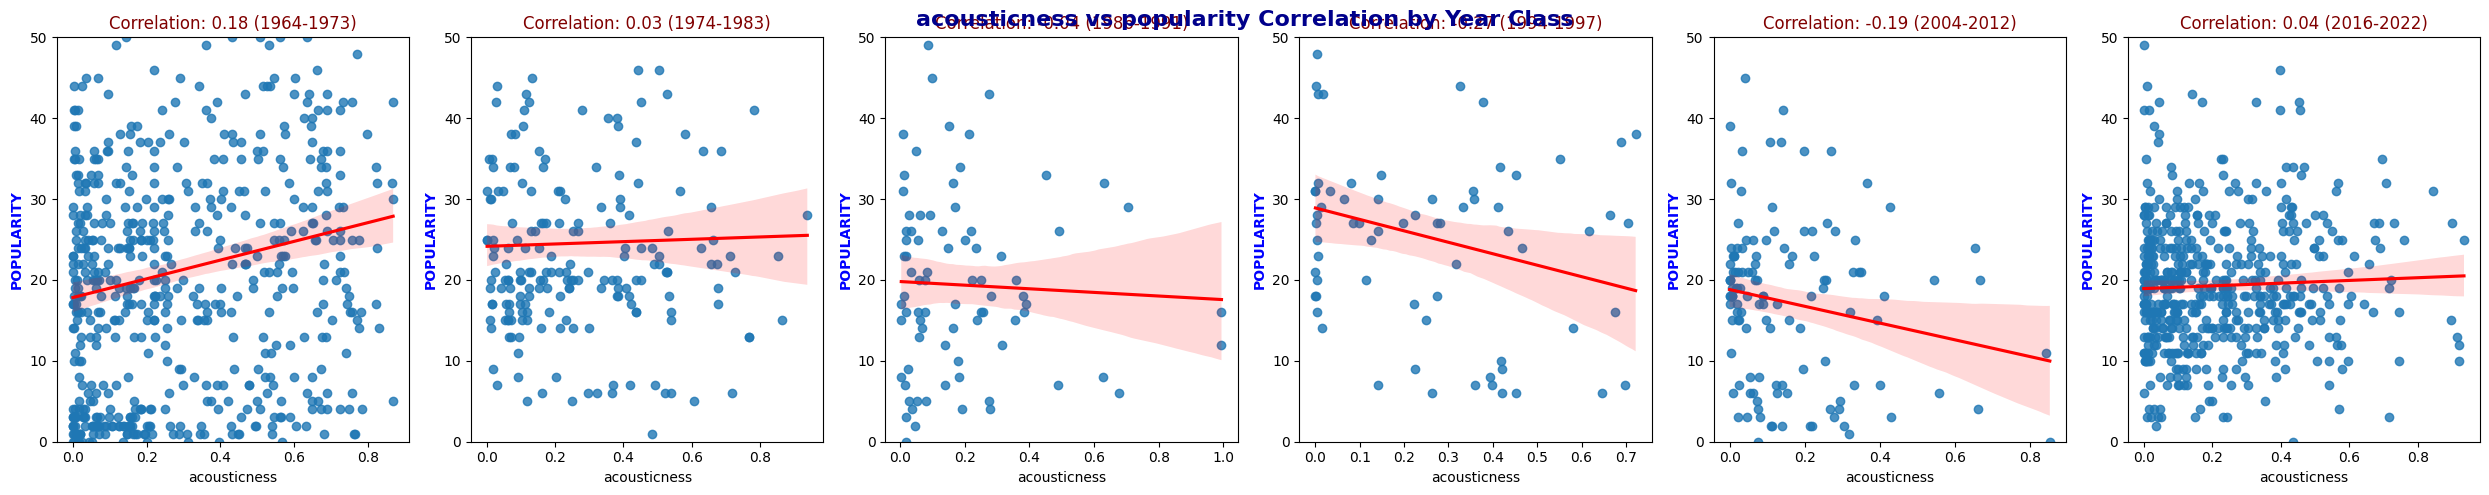

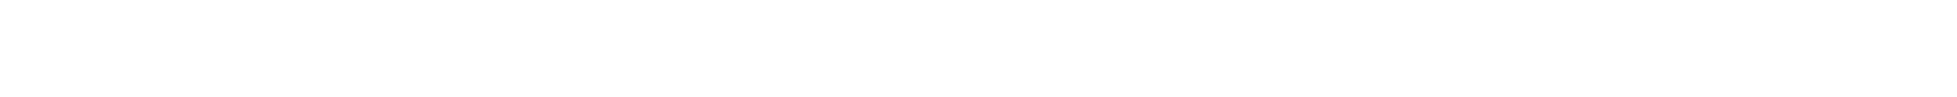

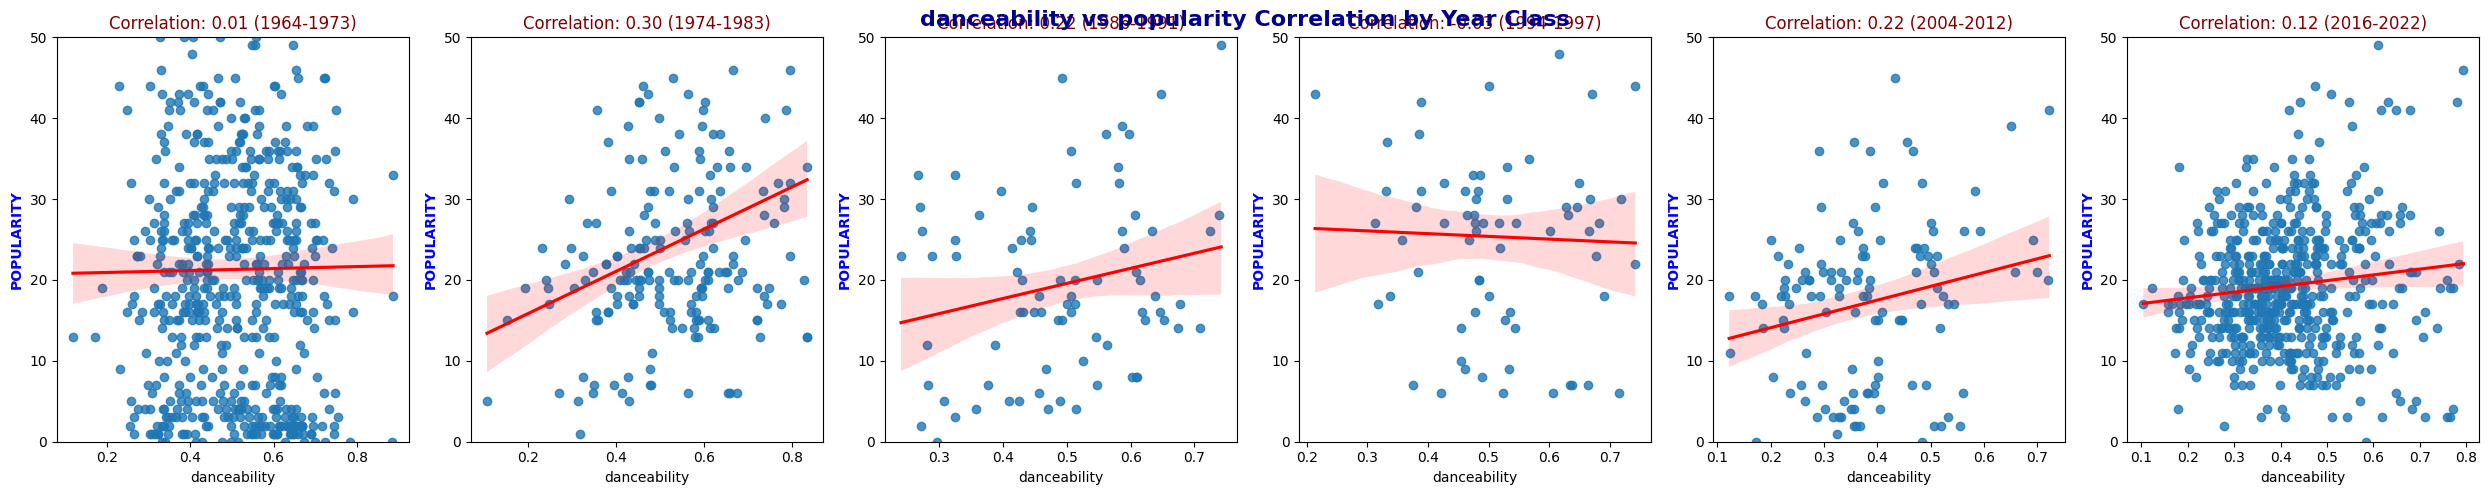

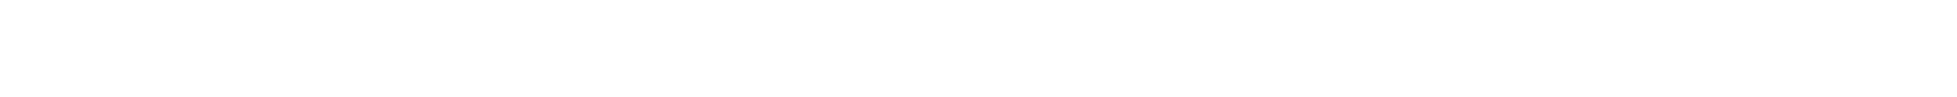

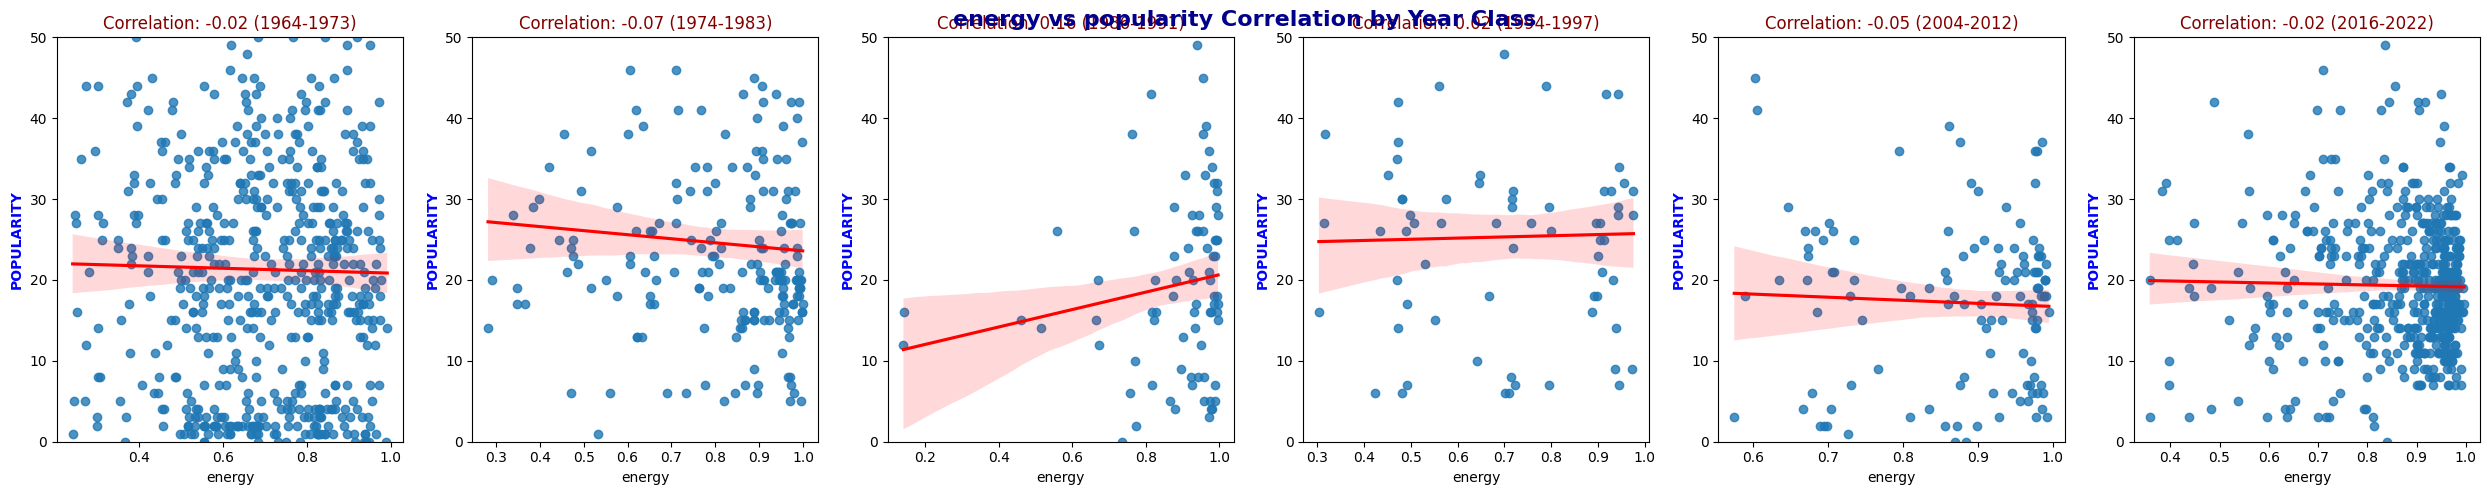

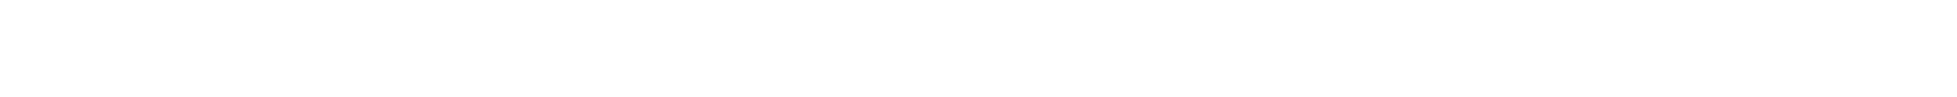

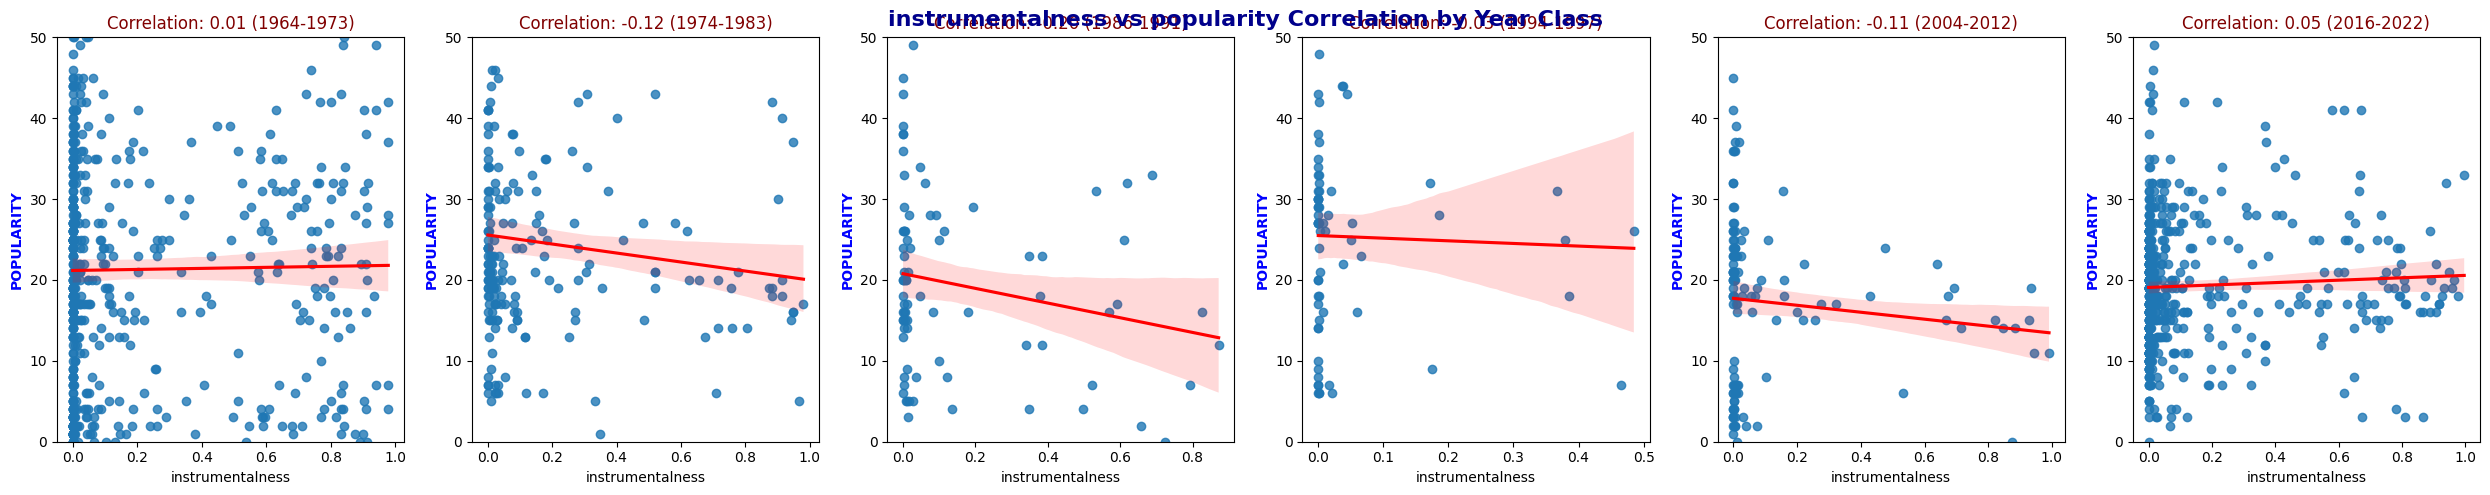

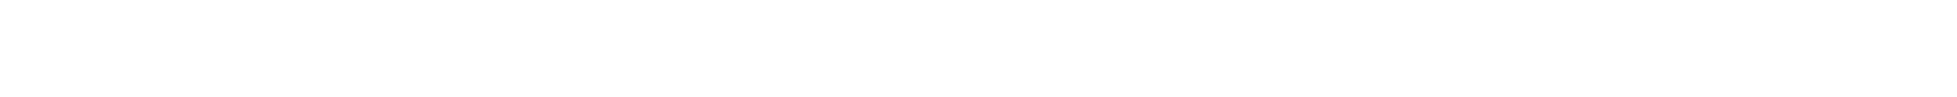

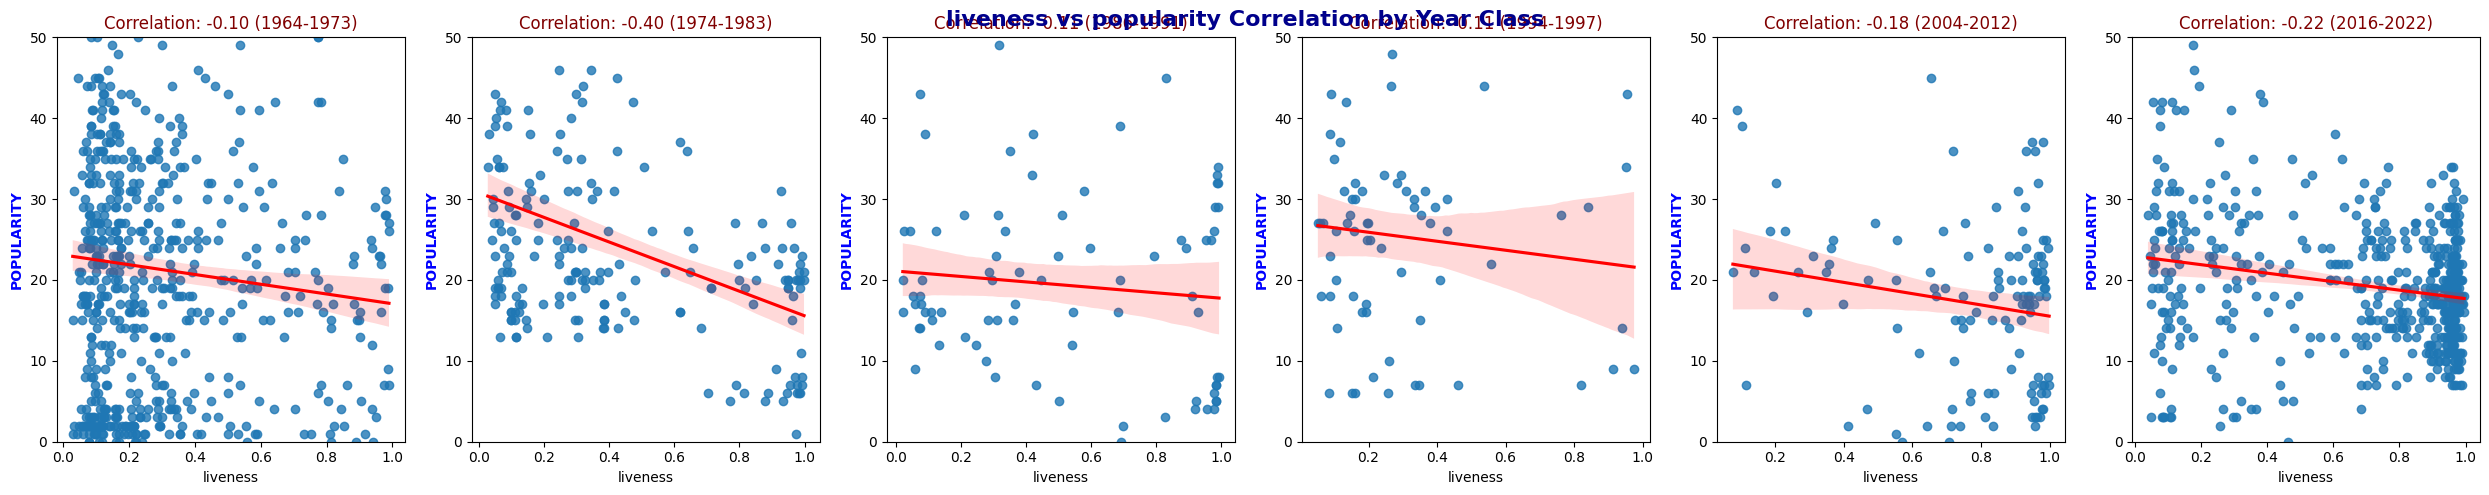

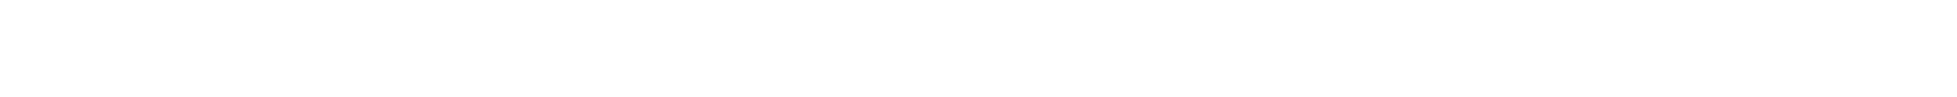

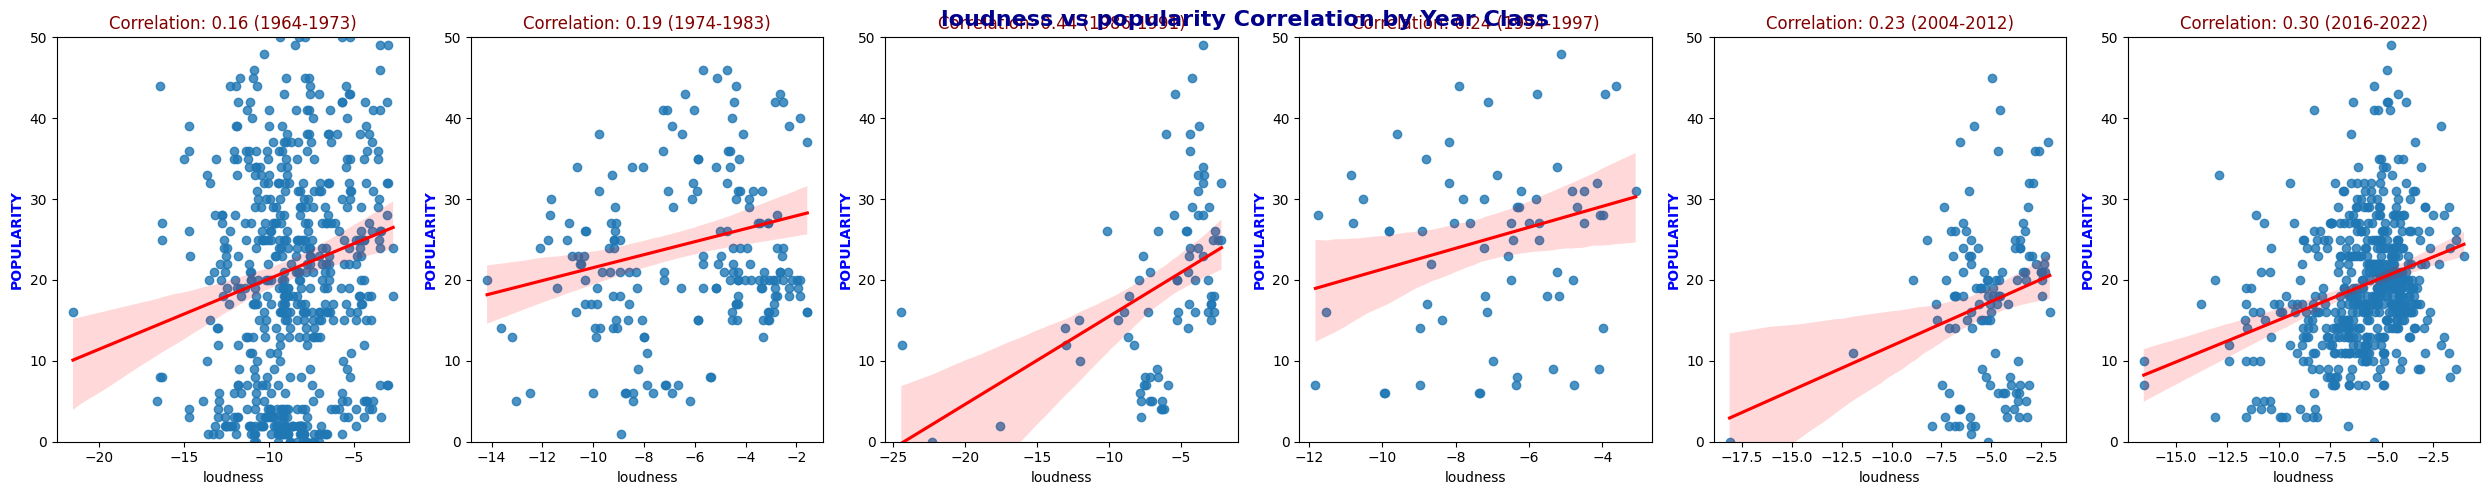

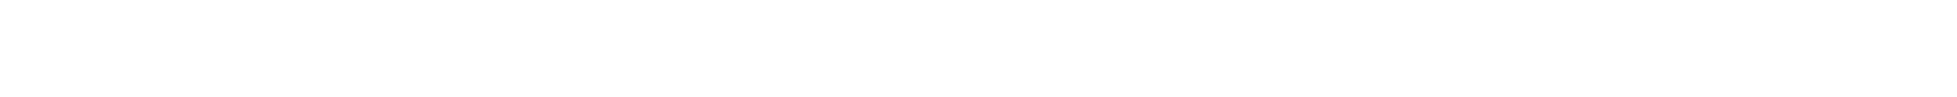

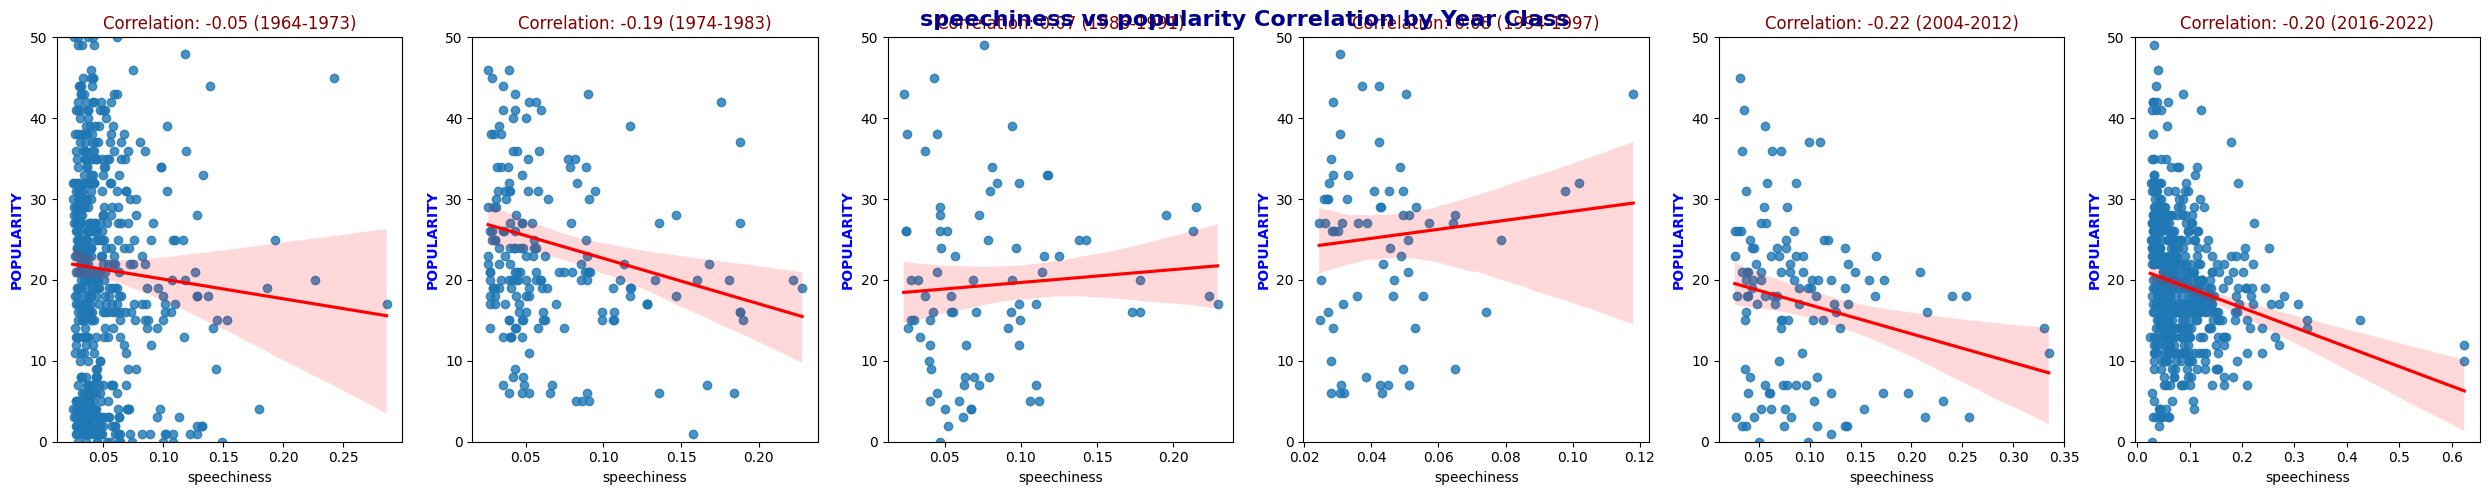

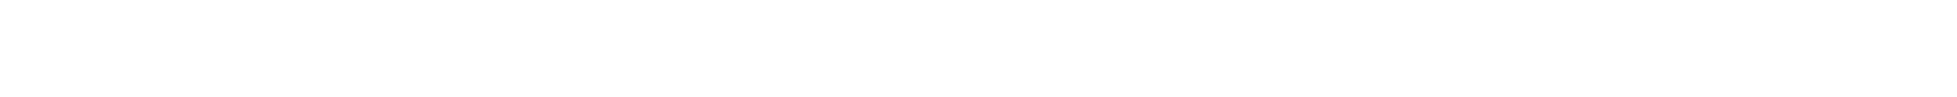

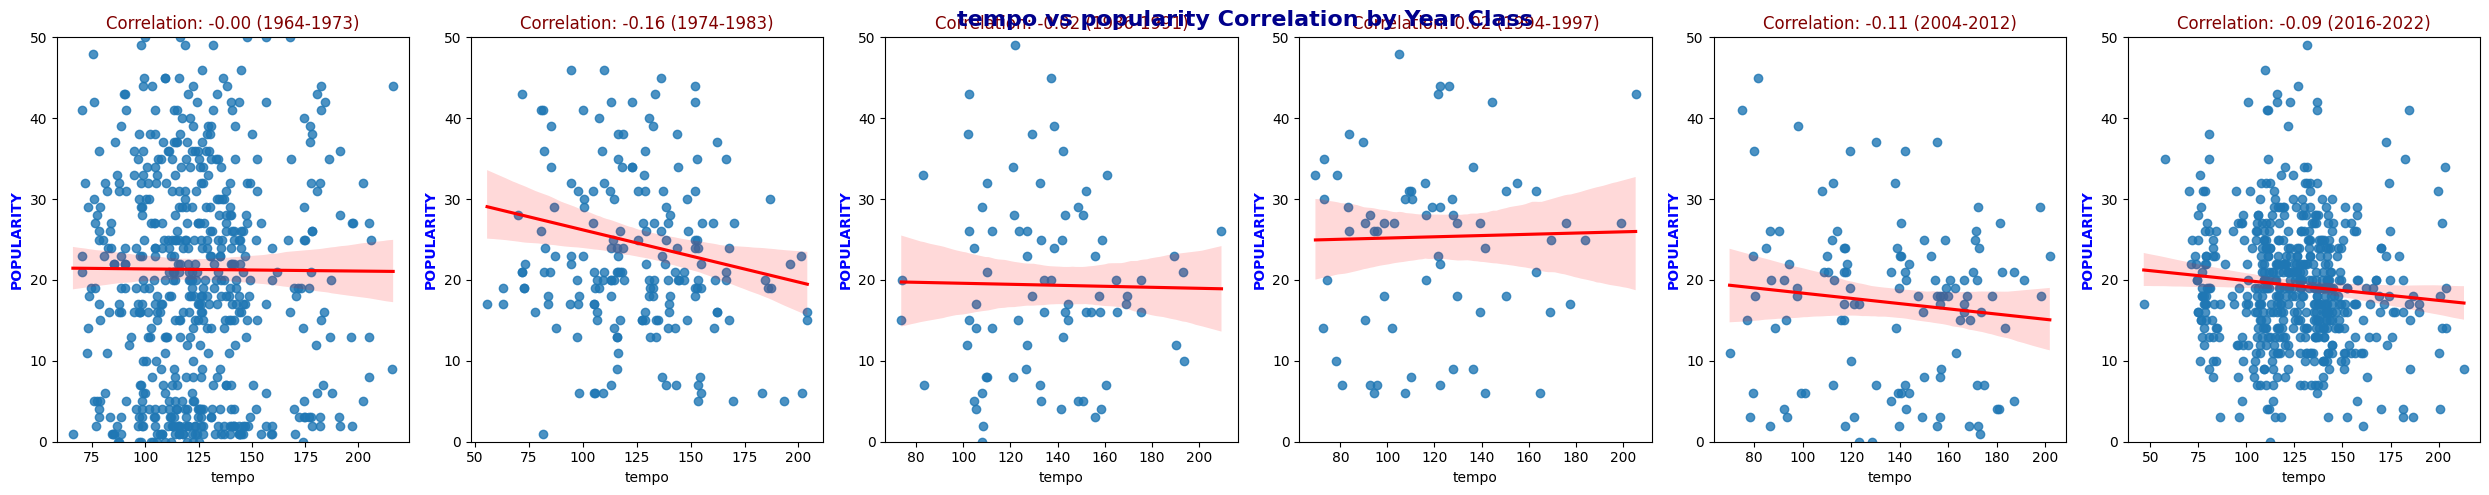

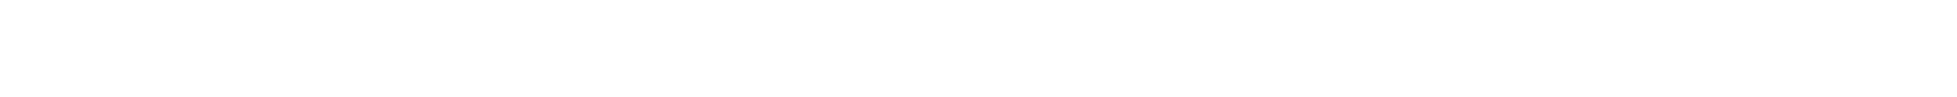

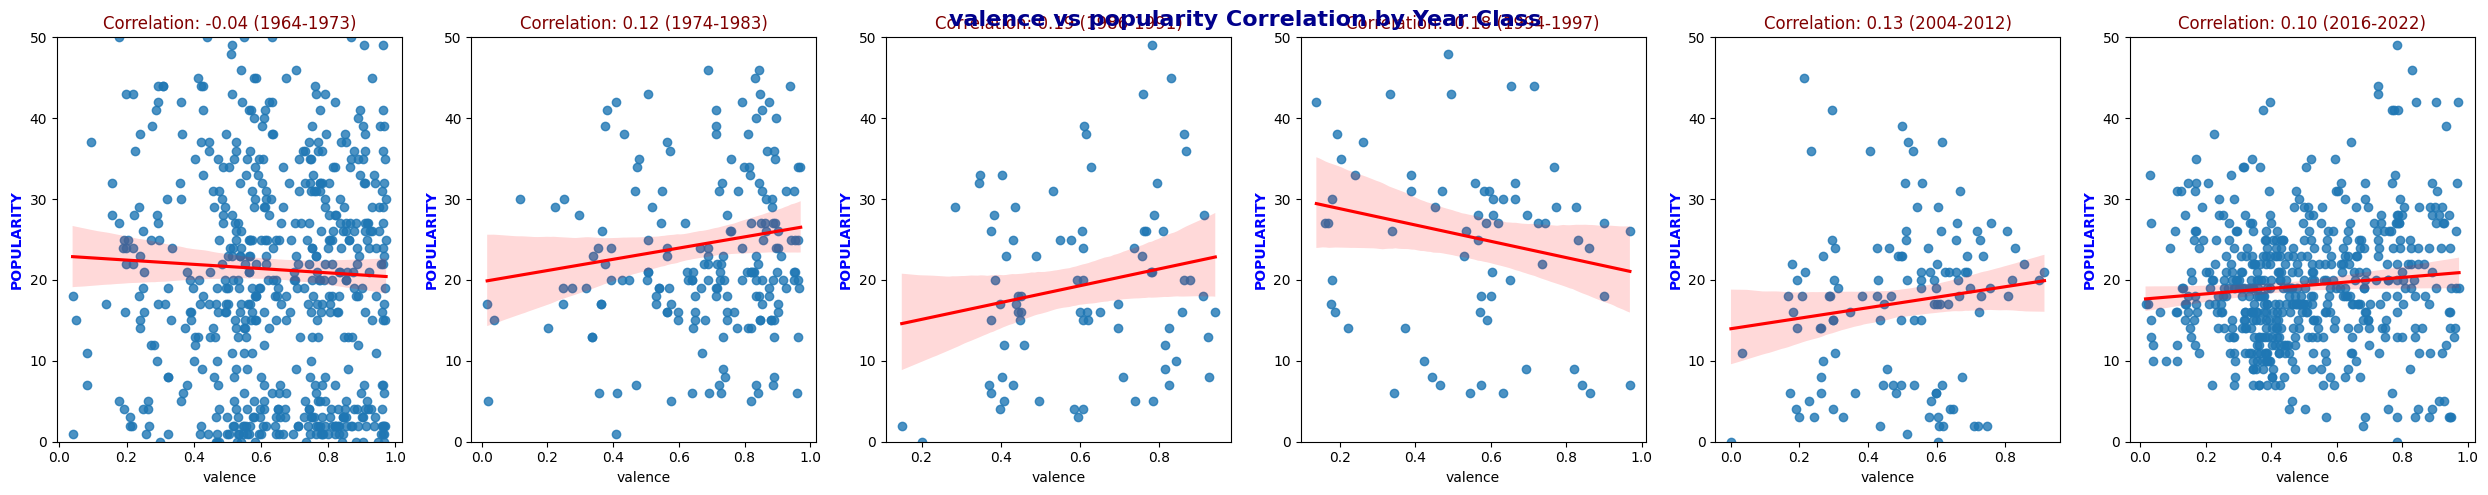

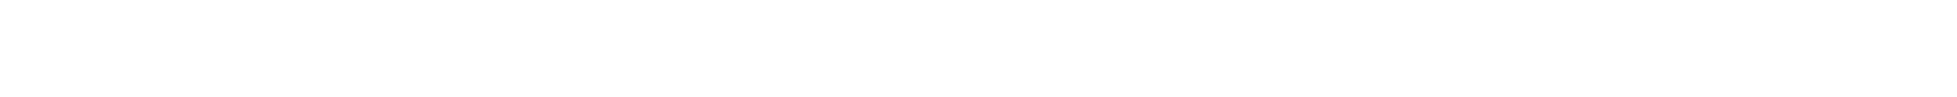

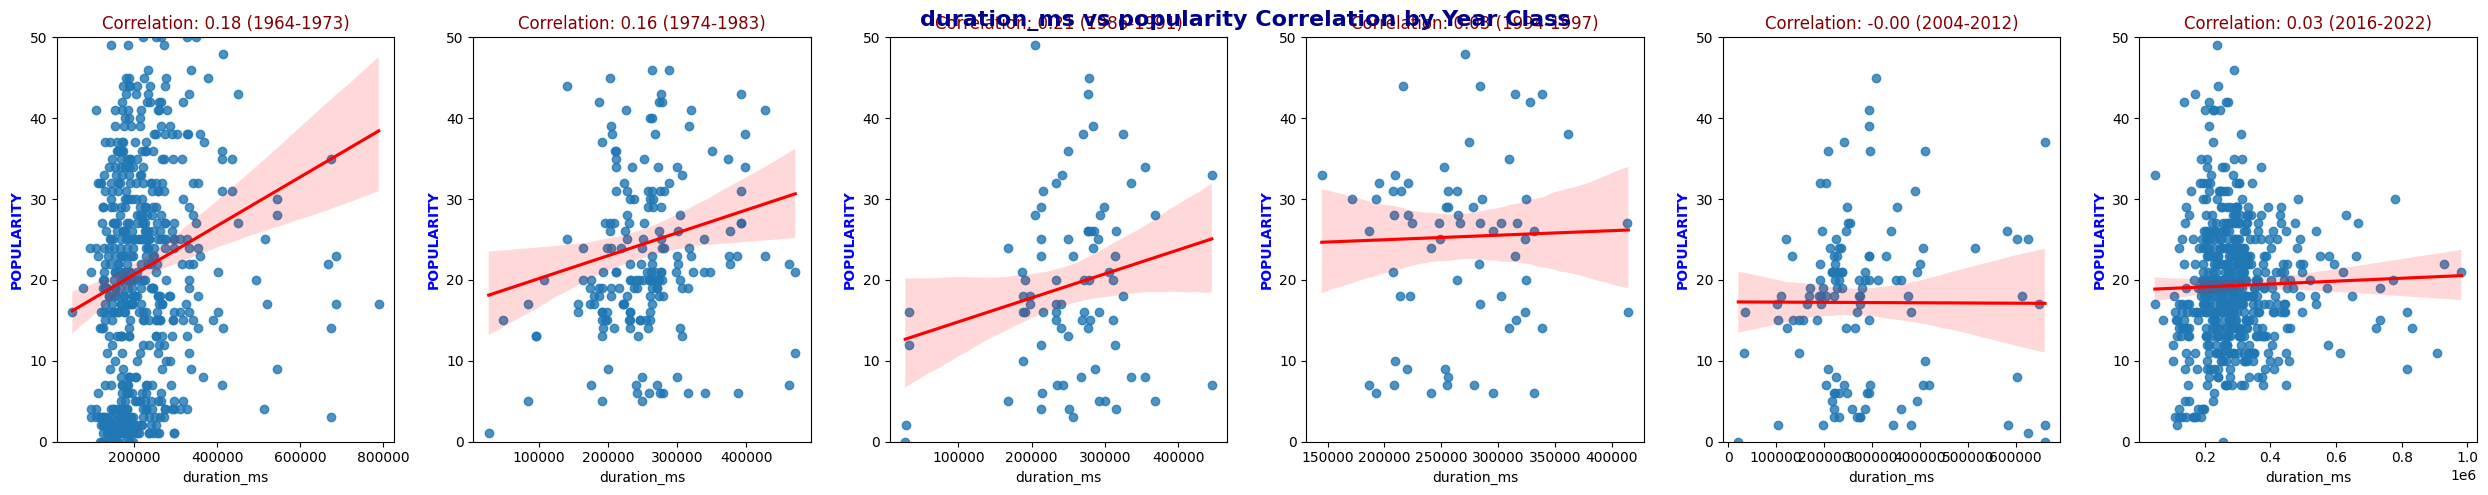

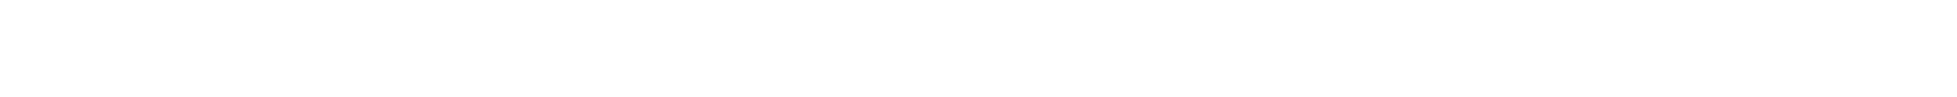

In [77]:
y= 'popularity'
corr_d = {}
vars = num_vars.drop('popularity')
for var in vars:
    i = 0
    temp_d = []
    f,ax = plt.subplots(1,6, figsize=(25, 5))
    for a in range(1, 7):
        subdata =  data_new.loc[data_new['year_class'] == a]
        sns.regplot(data=subdata, x=var, y=y, ax=ax[i], line_kws={'color': 'red'})
        ax[i].set_ylim(0,50)
        ax[i].set_title(f'{var} vs {y} for Year Class {a}')
        ax[i].set_xlabel(var)
        ax[i].set_ylabel(y.upper(), weight='bold', color='blue')
        min_year = subdata['year'].min()
        max_year = subdata['year'].max()
        corr = subdata[var].corr(subdata[y])
        temp_d.append(corr)
        string = f"Correlation: {corr:.2f} ({min_year}-{max_year})"
        ax[i].set_title(string, size =12, color='maroon')
        i += 1
    corr_d[var] = temp_d
    plt.tight_layout()
    plt.suptitle(f'{var} vs {y} Correlation by Year Class', fontsize=16, weight='bold', color='darkblue')
    plt.figure(figsize=(25,1))
    plt.axis('off')
    corr_d.update({var: temp_d})
    plt.show()
    


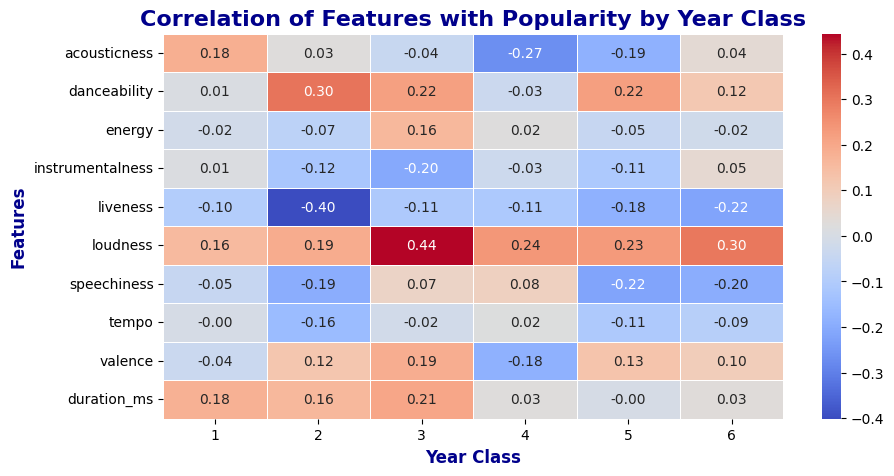

In [79]:
relationship = pd.DataFrame(corr_d, index=[1, 2, 3, 4, 5, 6]).T
plt.figure(figsize=(10, 5))
sns.heatmap(relationship, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Features with Popularity by Year Class', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Year Class', fontsize=12, weight='bold', color='darkblue')
plt.ylabel('Features', fontsize=12, weight='bold', color='darkblue')
plt.show()


## Since there are 12 numerical variables, we can use PCA to reduce the dimensionality

## PCA : Dimentionality Reduction

In [82]:
data_new.loc[:,'acousticness':'duration_ms'].describe()

acousticness  danceability       energy  instrumentalness    liveness  \
count   1610.000000   1610.000000  1610.000000       1610.000000  1610.00000   
mean       0.250475      0.468860     0.792352          0.164170     0.49173   
std        0.227397      0.141775     0.179886          0.276249     0.34910   
min        0.000009      0.104000     0.141000          0.000000     0.02190   
25%        0.058350      0.362250     0.674000          0.000219     0.15300   
50%        0.183000      0.458000     0.848500          0.013750     0.37950   
75%        0.403750      0.578000     0.945000          0.179000     0.89375   
max        0.994000      0.887000     0.999000          0.996000     0.99800   

          loudness  speechiness        tempo      valence   popularity  \
count  1610.000000  1610.000000  1610.000000  1610.000000  1610.000000   
mean     -6.971615     0.069512   126.082033     0.582165    20.788199   
std       2.994003     0.051631    29.233483     0.231253    12.426859   
min     -24.408000     0.023200    46.525000     0.000000     0.000000   
25%      -8.982500     0.036500   107.390750     0.404250    13.000000   
50%      -6.523000     0.051200   124.404500     0.583000    20.000000   
75%      -4.608750     0.086600   142.355750     0.778000    27.000000   
max      -1.014000     0.624000   216.304000     0.974000    80.000000   

         duration_ms  
count    1610.000000  
mean   257736.488199  
std    108333.474920  
min     21000.000000  
25%    190613.000000  
50%    243093.000000  
75%    295319.750000  
max    981866.000000

In [83]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_new.loc[:, 'acousticness':'duration_ms'])

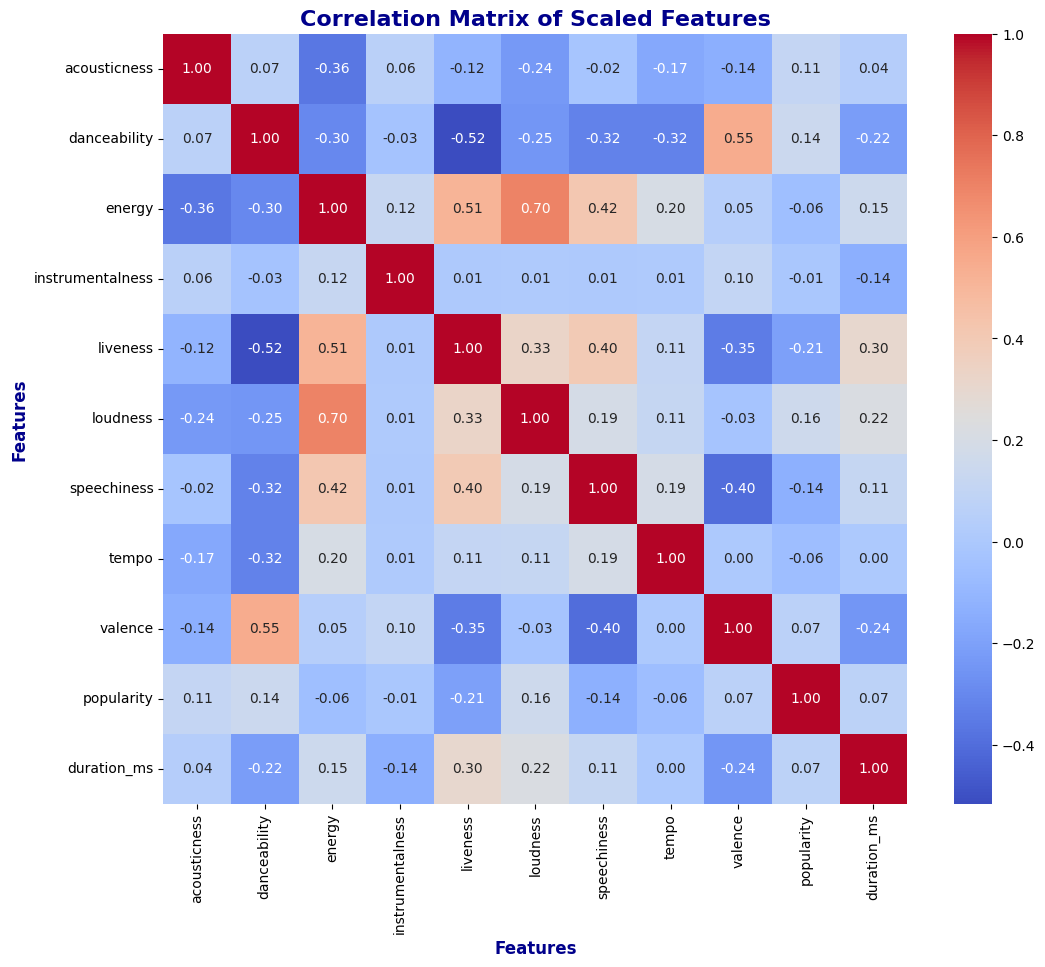

In [86]:
corr_matrix = np.corrcoef(scaled_data, rowvar=False)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=data_new.loc[:, 'acousticness':'duration_ms'].columns, yticklabels=data_new.loc[:, 'acousticness':'duration_ms'].columns)
plt.title('Correlation Matrix of Scaled Features', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Features', fontsize=12, weight='bold', color='darkblue')
plt.ylabel('Features', fontsize=12, weight='bold', color='darkblue')
plt.show()

In [87]:
eig_values, eig_vectors = np.linalg.eig(corr_matrix)

In [89]:
var_cap = sorted((eig_values / eig_values.sum()) * 100, reverse=True)

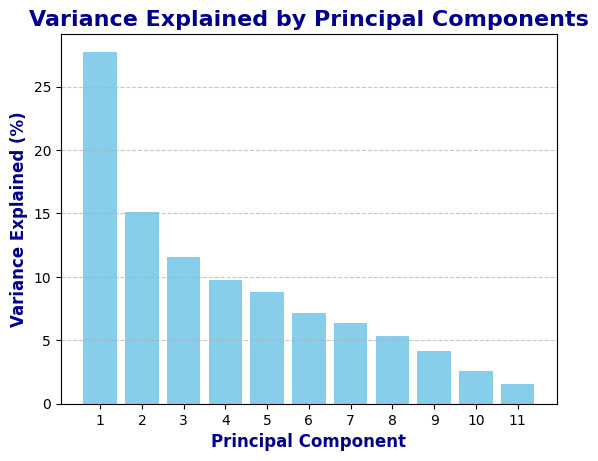

In [90]:
plt.bar(x=range(1,12), height=var_cap, color='skyblue')
plt.xlabel('Principal Component', fontsize=12, weight='bold', color='darkblue')
plt.ylabel('Variance Explained (%)', fontsize=12, weight='bold', color='darkblue')
plt.title('Variance Explained by Principal Components', fontsize=16, weight='bold', color='darkblue')
plt.xticks(range(1, 12))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [93]:
np.cumsum(var_cap)

array([ 27.74359058,  42.82906117,  54.3865868 ,  64.11804076,
        72.89472406,  80.0476851 ,  86.40589916,  91.73863835,
        95.87767144,  98.46508059, 100.        ])

In [94]:
eig_values

array([3.05179496, 1.65940177, 1.27132782, 0.16884114, 0.28461501,
       1.07045994, 0.45529364, 0.58660131, 0.96543516, 0.69940355,
       0.78682571])

In [95]:
pca = PCA(n_components=6)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])


/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


In [96]:
exclude_var = data_new.loc[:, 'acousticness':'duration_ms'].columns
obj_cat_data = data_new.loc[:, ~data_new.columns.isin(exclude_var)]

In [97]:
data_final = pd.concat([pca_df, obj_cat_data.reset_index(drop=True)], axis=1)
data_final.head(5)

PC1       PC2       PC3       PC4       PC5       PC6  \
0  0.836234 -0.646269 -1.812473  2.832309 -0.004671  0.873480   
1  1.823819 -0.531577  0.852942  1.040904  0.540421  0.205021   
2  1.945802 -0.447652  0.676081  1.578714  0.363403  0.528223   
3  2.638875 -1.721583  0.964908  0.777412  0.455003  1.852488   
4  2.262631 -1.057508  1.057665  0.393980  0.444432  0.356107   

                          name               album track_number  year  month  \
0   Concert Intro Music - Live  Licked Live In NYC            1  2022      6   
1   Street Fighting Man - Live  Licked Live In NYC            2  2022      6   
2           Start Me Up - Live  Licked Live In NYC            3  2022      6   
3  If You Can't Rock Me - Live  Licked Live In NYC            4  2022      6   
4            Don’t Stop - Live  Licked Live In NYC            5  2022      6   

   day year_class  
0   10          6  
1   10          6  
2   10          6  
3   10          6  
4   10          6

In [98]:
data_final.drop(columns=['year_class'], inplace=True)
fd = pd.get_dummies(data_final)

In [99]:
fd.head()

PC1       PC2       PC3       PC4       PC5       PC6  year  month  \
0  0.836234 -0.646269 -1.812473  2.832309 -0.004671  0.873480  2022      6   
1  1.823819 -0.531577  0.852942  1.040904  0.540421  0.205021  2022      6   
2  1.945802 -0.447652  0.676081  1.578714  0.363403  0.528223  2022      6   
3  2.638875 -1.721583  0.964908  0.777412  0.455003  1.852488  2022      6   
4  2.262631 -1.057508  1.057665  0.393980  0.444432  0.356107  2022      6   

   day  name_(I Can't Get No) Satisfaction - Live  ...  track_number_38  \
0   10                                      False  ...            False   
1   10                                      False  ...            False   
2   10                                      False  ...            False   
3   10                                      False  ...            False   
4   10                                      False  ...            False   

   track_number_39  track_number_40  track_number_41  track_number_42  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   track_number_43  track_number_44  track_number_45  track_number_46  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   track_number_47  
0            False  
1            False  
2            False  
3            False  
4            False  

[5 rows x 1100 columns]

## Performing Cluster Analysis

In [100]:
from sklearn.cluster import KMeans

In [101]:
errors=[]
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(fd)
    errors.append(kmeans.inertia_)

/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-pac

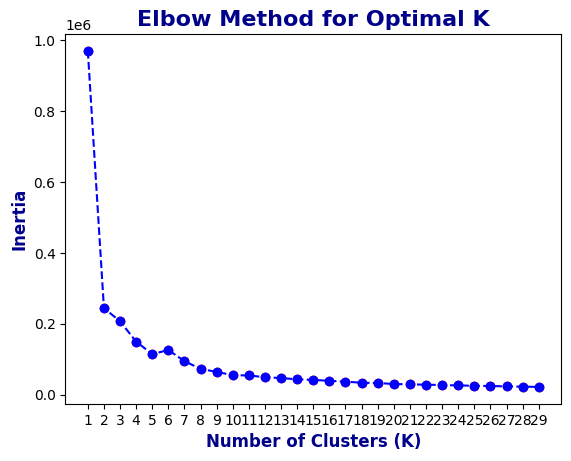

In [102]:
plt.plot(range(1, 30), errors, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal K', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Number of Clusters (K)', fontsize=12, weight='bold', color='darkblue')
plt.ylabel('Inertia', fontsize=12, weight='bold', color='darkblue')
plt.xticks(range(1, 30))
plt.scatter(range(1, 30), errors, color='red')

In [103]:
kmn = KMeans(n_clusters=3, random_state=42)
kmn.fit(fd)

/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/gaurav_chauhan@optum.com/Library/Python/3.12/lib/python/site-pac

KMeans(n_clusters=3, random_state=42)

In [106]:
fd['clus_label'] = kmn.labels_
fd.groupby('clus_label').mean()

PC1       PC2       PC3       PC4       PC5       PC6  \
clus_label                                                               
0           0.835263 -0.080641  0.243741 -0.155942 -0.234133  0.028090   
1          -0.804588  0.075154 -0.113436  0.084645  0.131297  0.011831   
2           1.049460 -0.095681  0.035223 -0.049492 -0.083712 -0.051561   

                   year     month        day  \
clus_label                                     
0           2013.842407  7.601719  20.000000   
1           1972.282434  6.615385  15.918485   
2           2015.441026  8.761538   5.920513   

            name_(I Can't Get No) Satisfaction - Live  ...  track_number_38  \
clus_label                                             ...                    
0                                            0.011461  ...         0.002865   
1                                            0.002296  ...         0.000000   
2                                            0.007692  ...         0.000000   

            track_number_39  track_number_40  track_number_41  \
clus_label                                                      
0                  0.002865         0.002865         0.002865   
1                  0.000000         0.000000         0.000000   
2                  0.000000         0.000000         0.000000   

            track_number_42  track_number_43  track_number_44  \
clus_label                                                      
0                  0.002865         0.002865         0.002865   
1                  0.000000         0.000000         0.000000   
2                  0.000000         0.000000         0.000000   

            track_number_45  track_number_46  track_number_47  
clus_label                                                     
0                  0.002865         0.002865         0.002865  
1                  0.000000         0.000000         0.000000  
2                  0.000000         0.000000         0.000000  

[3 rows x 1100 columns]

## Cluster Profile

In [107]:
data_new = data_new.drop(columns='name')

In [109]:
data_dummy = pd.get_dummies(data_new)
data_dummy.head()

acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  ...  track_number_44  \
0       0.1100  118.001   0.0302          33  ...            False   
1       0.0759  131.455   0.3180          34  ...            False   
2       0.1150  130.066   0.3130          34  ...            False   
3       0.1930  132.994   0.1470          32  ...            False   
4       0.0930  130.533   0.2060          32  ...            False   

   track_number_45  track_number_46  track_number_47  year_class_1  \
0            False            False            False         False   
1            False            False            False         False   
2            False            False            False         False   
3            False            False            False         False   
4            False            False            False         False   

   year_class_2  year_class_3  year_class_4  year_class_5  year_class_6  
0         False         False         False         False          True  
1         False         False         False         False          True  
2         False         False         False         False          True  
3         False         False         False         False          True  
4         False         False         False         False          True  

[5 rows x 157 columns]

In [115]:
dummy_copy = data_dummy.copy()
dummy_copy['cluster'] = kmn.labels_
clus_prof_1 = dummy_copy.groupby('cluster').mean().reset_index()
clus_prof_1.insert(loc=0,column='size', value=dummy_copy.groupby('cluster').size().values)
clus_prof_1

size  cluster  acousticness  danceability    energy  instrumentalness  \
0   349        0      0.205601      0.433576  0.849636          0.115928   
1   871        1      0.284670      0.512641  0.739677          0.189944   
2   390        2      0.214261      0.402656  0.858731          0.149778   

   liveness  loudness  speechiness       tempo  ...  track_number_44  \
0  0.636055 -5.861358     0.083141  123.389691  ...         0.002865   
1  0.342384 -7.894626     0.057101  125.540320  ...         0.000000   
2  0.696115 -5.903762     0.085035  129.701159  ...         0.000000   

   track_number_45  track_number_46  track_number_47  year_class_1  \
0         0.002865         0.002865         0.002865       0.00000   
1         0.000000         0.000000         0.000000       0.67853   
2         0.000000         0.000000         0.000000       0.00000   

   year_class_2  year_class_3  year_class_4  year_class_5  year_class_6  
0      0.000000      0.000000      0.197708      0.048711      0.753582  
1      0.229621      0.091848      0.000000      0.000000      0.000000  
2      0.000000      0.000000      0.000000      0.274359      0.725641  

[3 rows x 159 columns]

## Alternate Without Dimentionality reduction

In [116]:
data_dummy_copy_2 = data_dummy.copy()
data_dummy_copy_2['cluster'] = kmn.labels_
clus_prof_2 = data_dummy_copy_2.groupby('cluster').mean().reset_index()
clus_prof_2.insert(loc=0, column='size', value=data_dummy_copy_2.groupby('cluster').size().values)
clus_prof_2

size  cluster  acousticness  danceability    energy  instrumentalness  \
0   349        0      0.205601      0.433576  0.849636          0.115928   
1   871        1      0.284670      0.512641  0.739677          0.189944   
2   390        2      0.214261      0.402656  0.858731          0.149778   

   liveness  loudness  speechiness       tempo  ...  track_number_44  \
0  0.636055 -5.861358     0.083141  123.389691  ...         0.002865   
1  0.342384 -7.894626     0.057101  125.540320  ...         0.000000   
2  0.696115 -5.903762     0.085035  129.701159  ...         0.000000   

   track_number_45  track_number_46  track_number_47  year_class_1  \
0         0.002865         0.002865         0.002865       0.00000   
1         0.000000         0.000000         0.000000       0.67853   
2         0.000000         0.000000         0.000000       0.00000   

   year_class_2  year_class_3  year_class_4  year_class_5  year_class_6  
0      0.000000      0.000000      0.197708      0.048711      0.753582  
1      0.229621      0.091848      0.000000      0.000000      0.000000  
2      0.000000      0.000000      0.000000      0.274359      0.725641  

[3 rows x 159 columns]

## Visualization

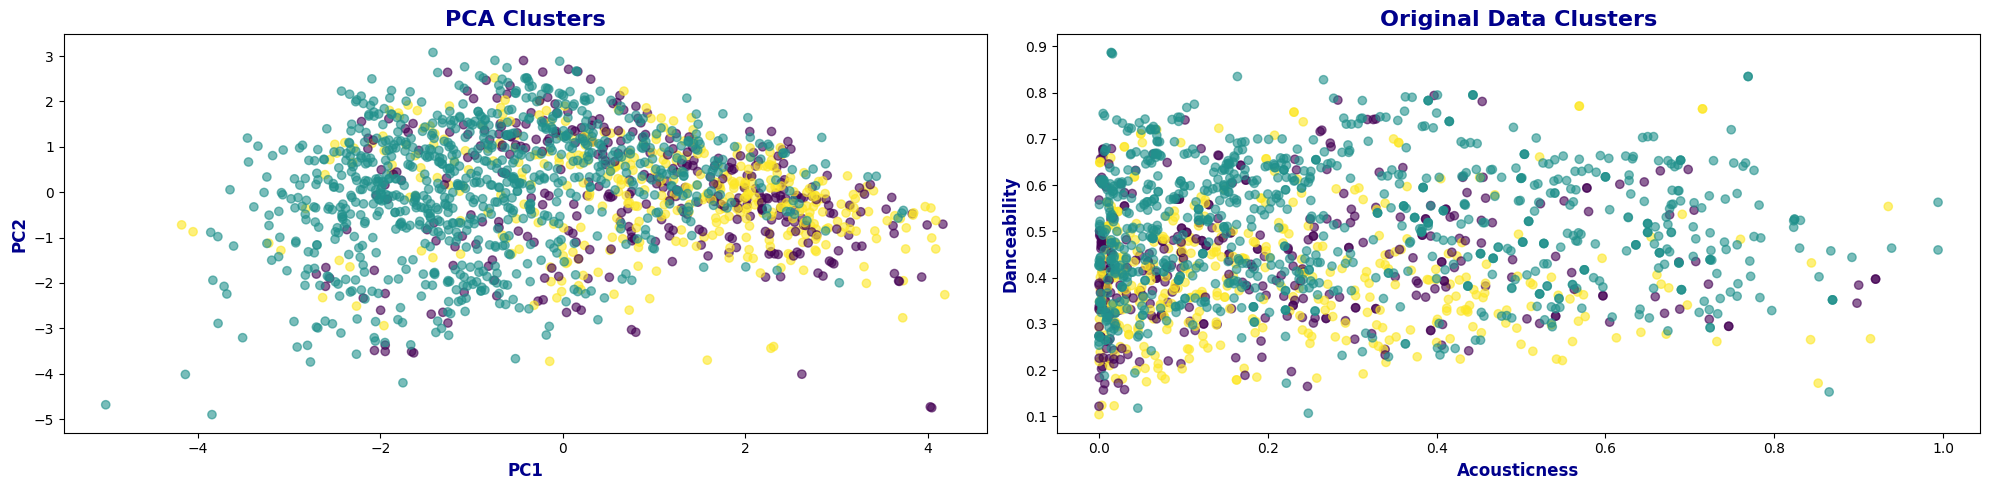

In [117]:
f,ax = plt.subplots(1, 2, figsize=(20, 5))
## PCA Data
ax[0].scatter(x= fd.PC1, y=fd.PC2, c=fd.clus_label, cmap='viridis', alpha=0.6)
ax[1].scatter(x=data_dummy_copy_2.acousticness, y=data_dummy_copy_2.danceability, c=data_dummy_copy_2.cluster, cmap='viridis', alpha=0.6)
ax[0].set_title('PCA Clusters', fontsize=16, weight='bold', color='darkblue')
ax[1].set_title('Original Data Clusters', fontsize=16, weight='bold', color='darkblue')
ax[0].set_xlabel('PC1', fontsize=12, weight='bold', color='darkblue')
ax[0].set_ylabel('PC2', fontsize=12, weight='bold', color='darkblue')
ax[1].set_xlabel('Acousticness', fontsize=12, weight='bold', color='darkblue')
ax[1].set_ylabel('Danceability', fontsize=12, weight='bold', color='darkblue')
plt.tight_layout()
plt.show()